In [3]:
import numpy as np
from numpy import random as rd
import time
# from solvers_listos import *
from funciones import *
from demandas import *
import seaborn as sns
import json

In [4]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print
# el print es porque se corre allá



Inicial LS: ['N_0', 'N_2', 'N_0'], costo SO = 6115913.668682318
Final LS: {0: ['N_0', 'N_2', 'N_0'], 1: ['N_0', 'N_8', 'N_4', 'N_5', 'N_6', 'N_0'], 2: ['N_0', 'N_2', 'N_1', 'N_7', 'N_8', 'N_0'], 3: ['N_0', 'N_1', 'N_9', 'N_10', 'N_3', 'N_6', 'N_5', 'N_0'], 4: ['N_0', 'N_1', 'N_2', 'N_0']}, costo SO = 6115913.668682318
Tiempo: 0 | Ruta: ['N_0', 'N_2', 'N_0'] | costo_SO: 159.66304740858226 | costo_r: 234.54637068179076


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_0'], costo SO = 256782.25362288277
Final LS: {0: ['N_0', 'N_1', 'N_4', 'N_9', 'N_10', 'N_7', 'N_0'], 1: ['N_0', 'N_5', 'N_1', 'N_5', 'N_2', 'N_0'], 2: ['N_0', 'N_8', 'N_4', 'N_10', 'N_4', 'N_5', 'N_9', 'N_1', 'N_7', 'N_6', 'N_0'], 3: ['N_0', 'N_2', 'N_0'], 4: ['N_0', 'N_10', 'N_9', 'N_10', 'N_4', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_7', 'N_0']}, costo SO = 256782.25362288277
Tiempo: 1 | Ruta: ['N_0', 'N_1', 'N_4', 'N_9', 'N_10', 'N_7', 'N_0'] | costo_SO: 91.32443518822242 | costo_r: 1307.89099068

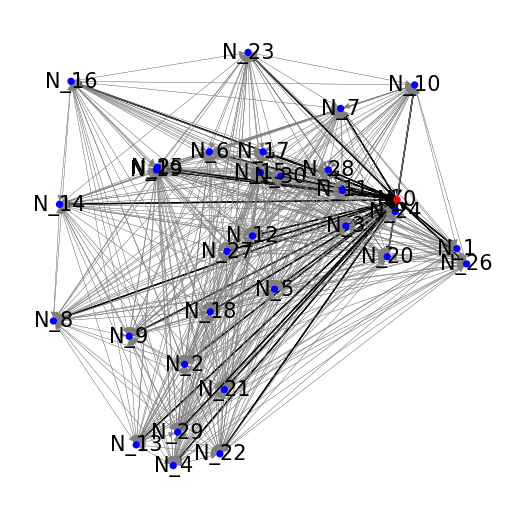

In [5]:
# np.random.seed(0)
horizonte = 60
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n30full.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'o', T=360, d=30, ruido=0)

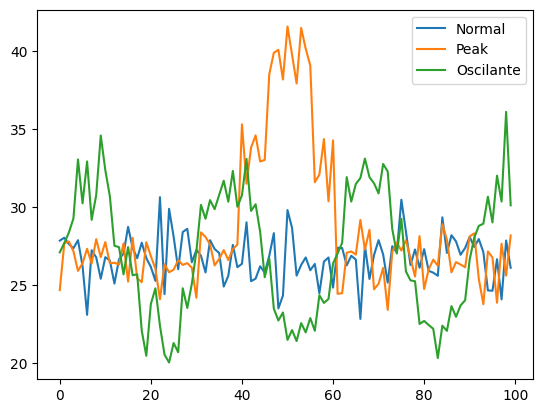

In [6]:
demanda_n = simular_demanda_previa(G, dist="n", T=100, ruido=0)
demanda_c = simular_demanda_previa(G, dist="c", T=100, ruido=0)
demanda_o = simular_demanda_previa(G, dist="o", T=100, ruido=0, d=30)

plt.plot(list(demanda_n['N_1']), label='Normal')
plt.plot(list(demanda_c['N_1']), label='Peak')
plt.plot(list(demanda_o['N_1']), label='Oscilante')
plt.legend()

In [7]:
#rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 360)
rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                          tipo_demanda = 'o', T = 365, d=30)

Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_26', 'N_20', 'N_24', 'N_28', 'N_17', 'N_15', 'N_25', 'N_16', 'N_23', 'N_7', 'N_11', 'N_3', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_0'] | costo_SO: 368.0475250830235 | costo_r: 2149.370901175596
Tiempo: 3 | Ruta: ['N_0', 'N_1', 'N_10', 'N_30', 'N_12', 'N_5', 'N_22', 'N_2', 'N_18', 'N_27', 'N_6', 'N_19', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1702.0071185541951
Tiempo: 4 | Ruta: ['N_0', 'N_24', 'N_26', 'N_20', 'N_3', 'N_11', 'N_28', 'N_15', 'N_17', 'N_7', 'N_23', 'N_16', 'N_25', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_0'

In [8]:
#rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 360, F = 15, cap = 871)
rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(grafo_inicial = G, dem_historico=historia, T = 365, F = 15, cap = 871,
                                                                              tipo_demanda = 'o', d=30)



Inicial LS: [], costo SO = 3415874.2631028793
Final LS: [[], [], ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_7', 'N_23', 'N_25', 'N_19', 'N_14', 'N_8', 'N_12', 'N_4', 'N_2', 'N_21', 'N_29', 'N_9', 'N_13', 'N_22', 'N_18', 'N_27', 'N_5', 'N_26', 'N_16'], ['N_0', 'N_1', 'N_10', 'N_6', 'N_12'], ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_7', 'N_23', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_5', 'N_26', 'N_16'], ['N_0'], ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16'], ['N_0'], ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_7', 'N_23', 'N_25', 'N_5', 'N_14', 'N_8', 'N_9', 'N_2', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_19', 'N_26', 'N_16'], ['N_0'

In [ ]:
insatisf_R = []
insatisf_P = []
print(len(costos_R[0]))
for dia in range(len(dems_P)):
    insatisf_R.append(costos_R[0][dia]/sum(dems_P[dia].values()))
    insatisf_P.append(costos_P[0][dia]/sum(dems_P[dia].values()))

len(insatisf_P)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#The data

#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(len(insatisf_R))]
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, insatisf_R, width, color = 'r', label = 'Instatisfacción Reactiva', align='edge')
ax.bar(range(len(insatisf_P)), insatisf_P,width, color = 'b', label = 'Instatisfacción Proactiva', align='edge')

ax.set_xlabel('Test histogram')
ax.set_ylabel('Y axis')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
plt.plot(smooth(inventarios_R, 10), color = 'red', label = 'Inventario Reactiva')
plt.plot(smooth(inventarios_P, 10), color = 'blue', label = 'Inventario Proactiva')

plt.xlabel('Tiempo')
plt.ylabel('Inventario')
plt.title('Inventario total en el tiempo')
plt.legend(['Inventario Pol. proactiva', 'Inventario Pol. reactiva'])
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0000,2000)

In [ ]:
# for i in range(60):
#     print(costos_R[0][i], costos_R[1][i])

costo_total_P = [costos_P[0][i] + costos_P[1][i] for i in range(len(costos_P[0]))]
costo_total_R = [costos_R[0][i] + costos_R[1][i] for i in range(len(costos_R[0]))]

In [ ]:
plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

In [ ]:
# plt.plot(smooth(inventarios_P, 7), color = 'red')
# plt.plot(smooth(inventarios_R, 7), color = 'blue')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

In [ ]:
costo_total_P_inv = [costos_P[0][i]*3 + costos_P[1][i] + inventarios_P[i]*2 for i in range(len(costos_P[0]))]
costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

In [ ]:
plt.plot(smooth(inventarios_R, 7), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(inventarios_P, 7), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2500)

In [ ]:
plt.plot(smooth(costo_total_R, 7), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(costo_total_P, 7), color = 'blue', label = 'Proactiva Total')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,2000)

In [ ]:

plt.figure(figsize=(10,6))

plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costo_total_P_inv, 10), color = 'blue', label = 'Proactiva Total')
plt.plot(smooth(inventarios_P, 10), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')
plt.plot(smooth(costos_P[0], 10), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 10), color = 'blue', linestyle = '--', label = 'Proactiva R')


plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
# plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,6000)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
l2 = plt.legend(bbox_to_anchor=(1.01, 0), loc="lower left", borderaxespad=0)
plt.show()

In [ ]:
# plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
# plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
# plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
# plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

costo_rutas_R = np.sum(costos_R[1])/1000000
costo_SO_R = np.sum(costos_R[0])*3/1000000
costo_inv_R = np.sum(inventarios_R)*2/1000000
CR = [costo_rutas_R, costo_SO_R, costo_inv_R]

costo_rutas_P = np.sum(costos_P[1])/1000000
costo_SO_P = np.sum(costos_P[0])*3/1000000
costo_inv_P = np.sum(inventarios_P)*2/1000000
CP = [costo_rutas_P, costo_SO_P, costo_inv_P]
#The data
print(CR, CP)
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(3)]
fig = plt.figure()
ax = fig.add_subplot(111)

# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, CR, width, color = 'r', label = 'Estrategia Reactiva', align='edge')
ax.bar(range(3), CP, width, color = 'b', label = 'Estrategia Proactiva', align='edge')
plt.xticks([0, 1, 2],['Rutas', 'Stockouts', 'Inventario'])
plt.xlabel('Categoría')
plt.ylabel('Costos (MM\$)')
plt.legend()
plt.ylim(0,2)
plt.show()

In [ ]:
# costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_P[0])*3, np.sum(costos_P[1]), np.sum(inventarios_P)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('Set3')
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Proactiva')
plt.show()

In [ ]:
CR_R = []
for cr in costos_R[1]:
    if cr == np.inf:
        CR_R.append(0)
    else:
        CR_R.append(cr)

In [ ]:
labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_R[0])*3, np.sum(CR_R), np.sum(inventarios_R)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('hls')[3:]
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Reactiva')
plt.show()

In [ ]:
#cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
#cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

#print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
#print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [ ]:
#datos = dispersion_intervalos(df)
        
#df_nodos['mean'] = datos['mean']
#df_nodos['std'] = datos['std']
#df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
#df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
#df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
#df_nodos

In [ ]:
#df_nodos_corr.corr()

In [ ]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}_osc.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'o', T=1000, d=30)
        #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                           tipo_demanda = 'o', T = 360, d=30)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')

In [ ]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

In [ ]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 365, F = 5, cap = cap_tpte)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


In [ ]:
inventarios_P = {k: datos_P[k]['inventarios'] for k in list(datos_P.keys())}
inventarios_R = {k: datos_R[k]['inventarios'] for k in list(datos_R.keys())}

In [ ]:


# generamos un dataframe para luego plotear
perdidas_P_1 = np.array(perdidas_P['n20estandar'])
dias = np.arange(1,366)
perdidas_R_1 = np.array(perdidas_R['n20estandar'])
# ahora graficamos
plt.figure(figsize=(15,5))
plt.plot(dias, perdidas_P_1, label = 'Politica P')

plt.plot(dias, perdidas_R_1, label = 'Politica R')

plt.legend()

plt.show()


## Simulación Completa

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 181.90352363314625 | costo_r: 365.1410686296462
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_5', 'N_6', 'N_1', 'N_2', 'N_0'] | costo_SO: 0 | costo_r: 1019.0353233182681
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1316.9486339749624
Tiempo: 4 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 154.2484909034098 | costo_r: 893.46265263657
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 583.946677846596
Tiempo: 6 | Ruta: ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1270.5538423822004
Tiempo: 7 | Ruta: ['N_0', 'N_4', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 

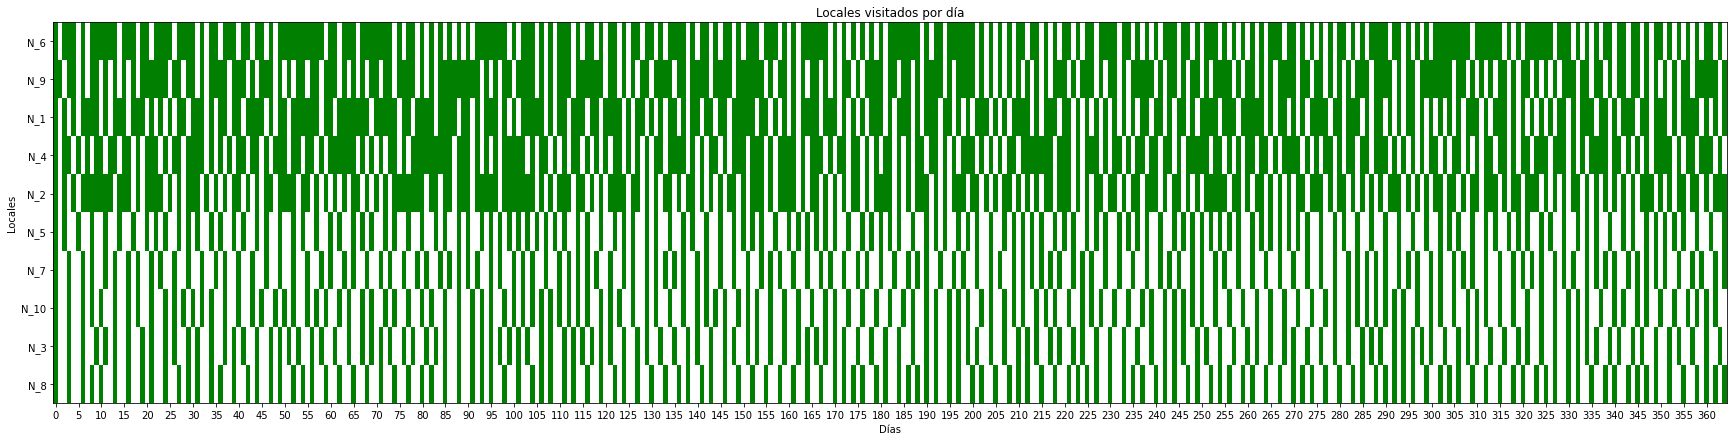

Listo n10empty.xlsx con demanda n
Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 60.00498903027004 | costo_r: 893.46265263657
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1309.2635952925966
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1094.6400199471364
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1309.2635952925966
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 

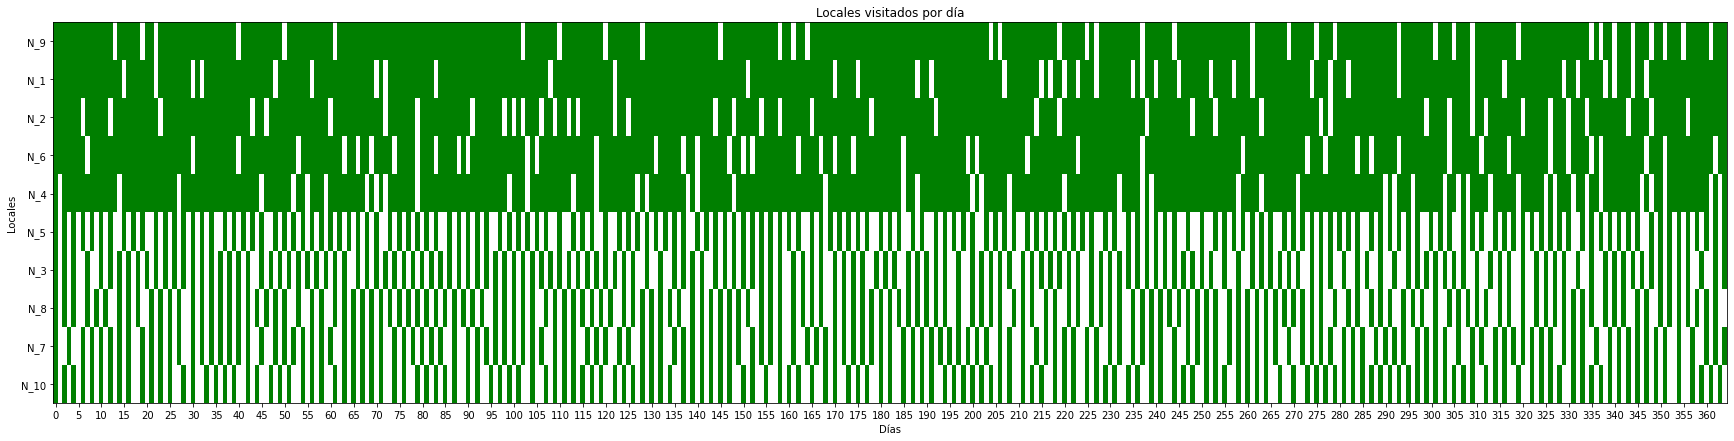

Listo n10empty.xlsx con demanda c
Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_2', 'N_1', 'N_0'] | costo_SO: 152.10914610345458 | costo_r: 701.0796598701113
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 131.8778649285925 | costo_r: 1137.6372722870103
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_8', 'N_0'] | costo_SO: 77.0605190300356 | costo_r: 1237.7107129110527
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1228.1515096088024
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1237.7140868651495
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0']

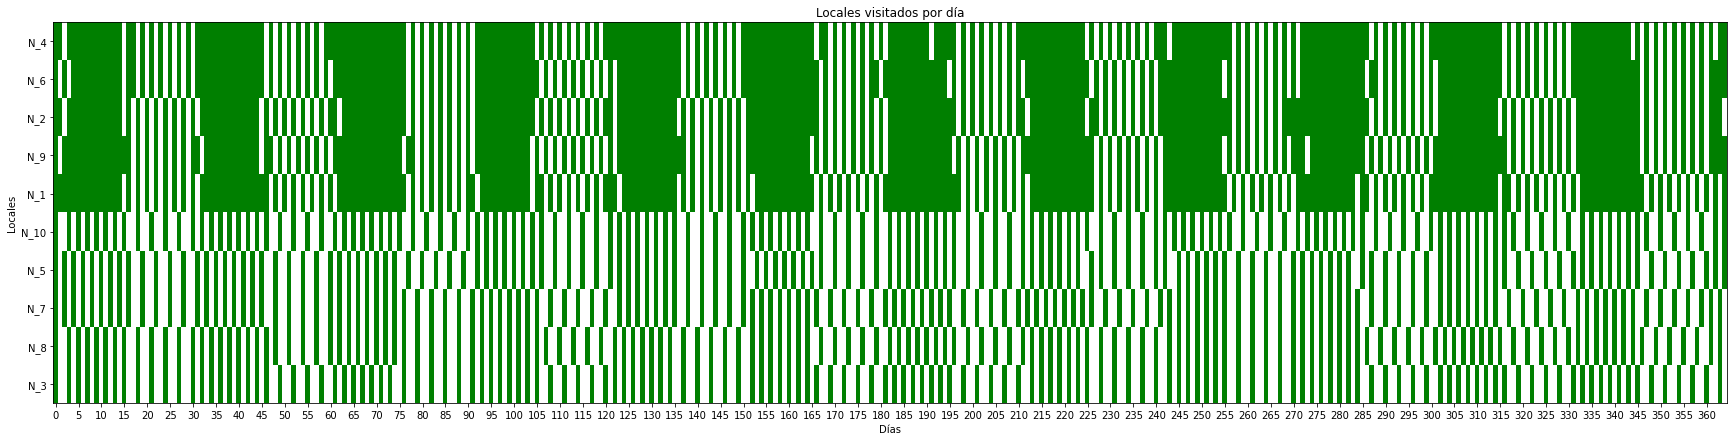

Listo n10empty.xlsx con demanda o
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 269.23216728130734 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 11.892580419174188 | costo_r: 1200.1316364054214
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1131.776811924839
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_2', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 930.8568613926329
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_8', 'N_5', 'N_0'] | costo_SO: 31.551763345343723 | costo_r: 1233.3368362301899
Tiempo: 5 | Ruta: ['N_0', 'N_10', 'N_2', 'N_6', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1079.739852897793
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1016.8390957559852
Tiempo: 7 | Ruta: ['N_0', 'N_10', 'N_2', 'N_1', '

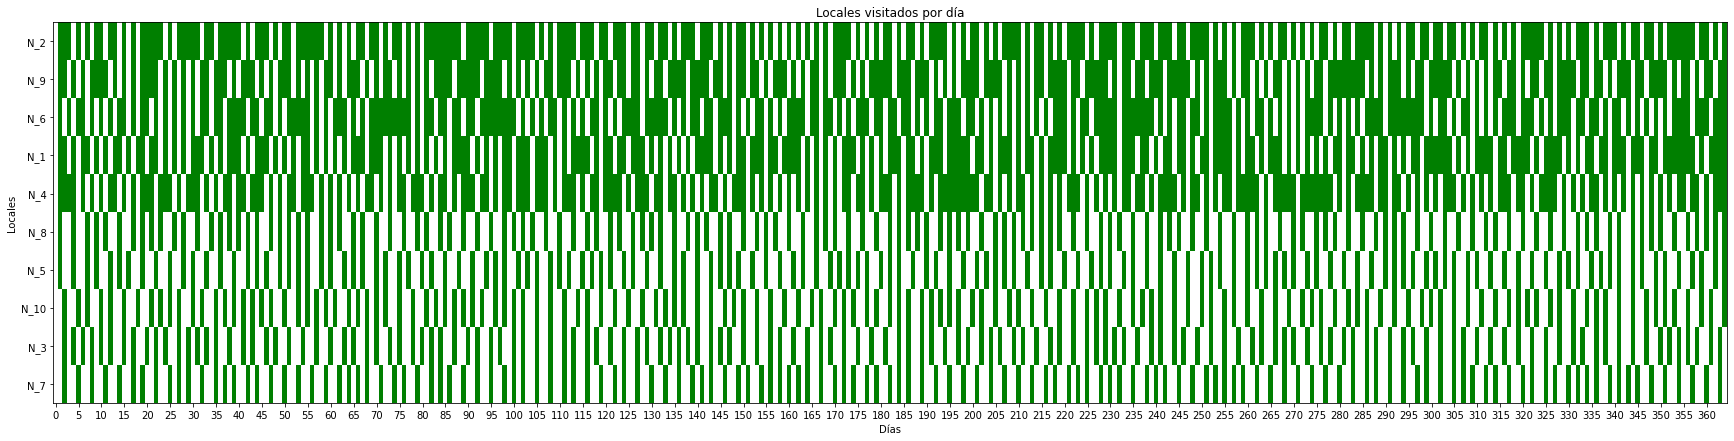

Listo n10estandar.xlsx con demanda n
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 29.200033390263197 | costo_r: 1401.9112653249767
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 942.4953023461746
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1330.708124878772
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_5', 'N_1', 'N_2', 'N_0'] | costo_SO: 0 | costo_r:

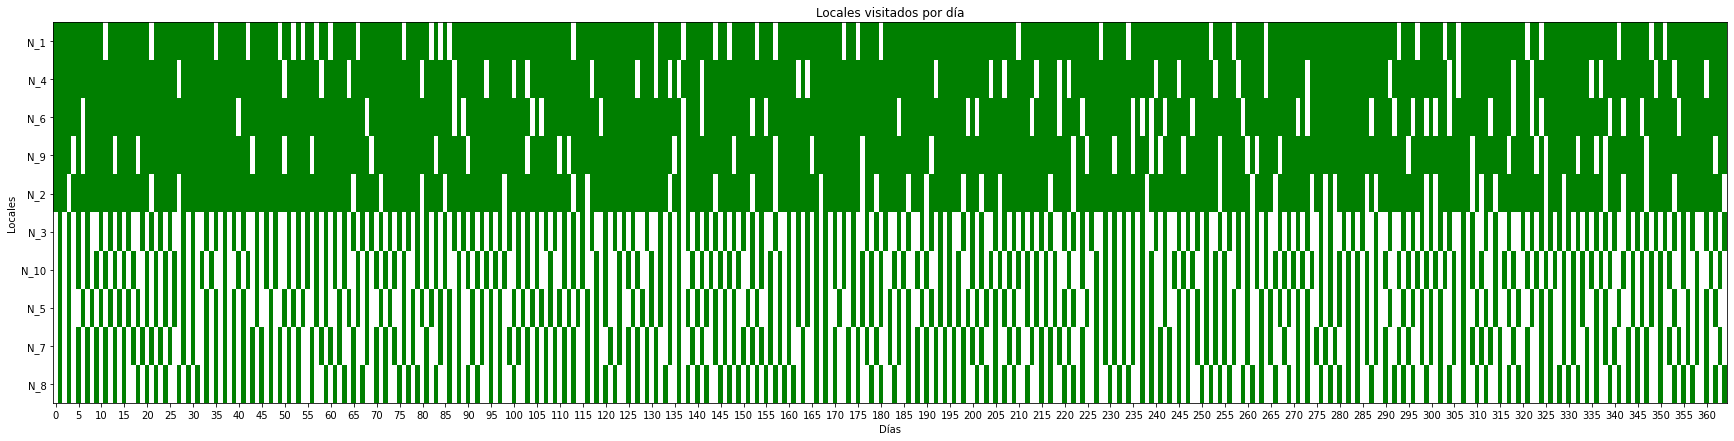

Listo n10estandar.xlsx con demanda c
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 205.85933232442198 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0'] | costo_SO: 208.36944014084617 | costo_r: 1117.1420116387858
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 29.04896867338661 | costo_r: 1330.3617568975299
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1117.1420116387858
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1330.708124878772
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1117.1420116387858
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'] | co

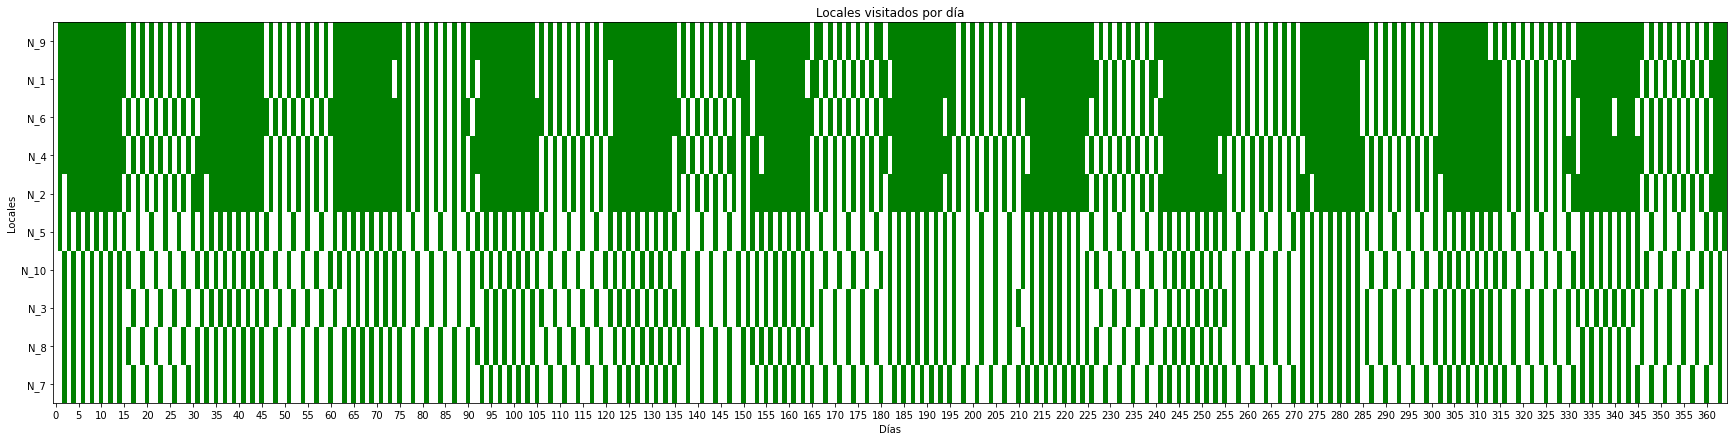

Listo n10estandar.xlsx con demanda o
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 942.4953023461746
Tiempo: 4 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 0 | costo_r: 365.1410686296462
Tiempo: 5 | Ruta: ['N_0', 'N_3', 'N_7', 'N_0'] | costo_SO: 39.04724527685189 | costo_r: 905.4473222503034
Tiempo: 6 | Ruta: ['N_0', 'N_10', 'N_1', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1071.579483232606
Tiempo: 7 | Ruta: ['N_0', 'N_4', 'N_2', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 930.8568613926329
Tiempo: 8 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 0 | costo_r: 365.1410686296462
Tiempo: 9 | Ruta: ['N_0', 'N_1', 'N_0'] | costo_S

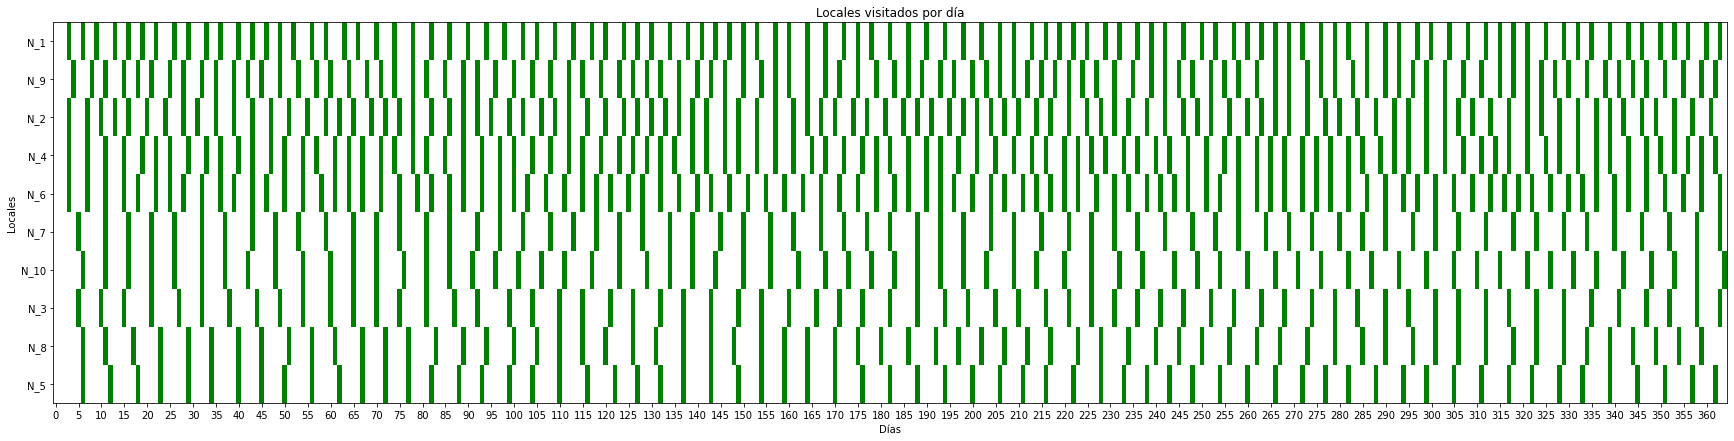

Listo n10full.xlsx con demanda n
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
No hay locales que visitar
Tiempo: 4 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 5 | Ruta: ['N_0', 'N_5', 'N_8', 'N_7', 'N_3', 'N_0'] | costo_SO: 0 | costo_r: 1151.0742948040097
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 817.791896628124
Tiempo: 7 | Ruta: ['N_0', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 751.3880488802041
Tiempo: 8 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 9 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_0'] | costo_SO: 0 | costo_r: 592.043254738832
Ti

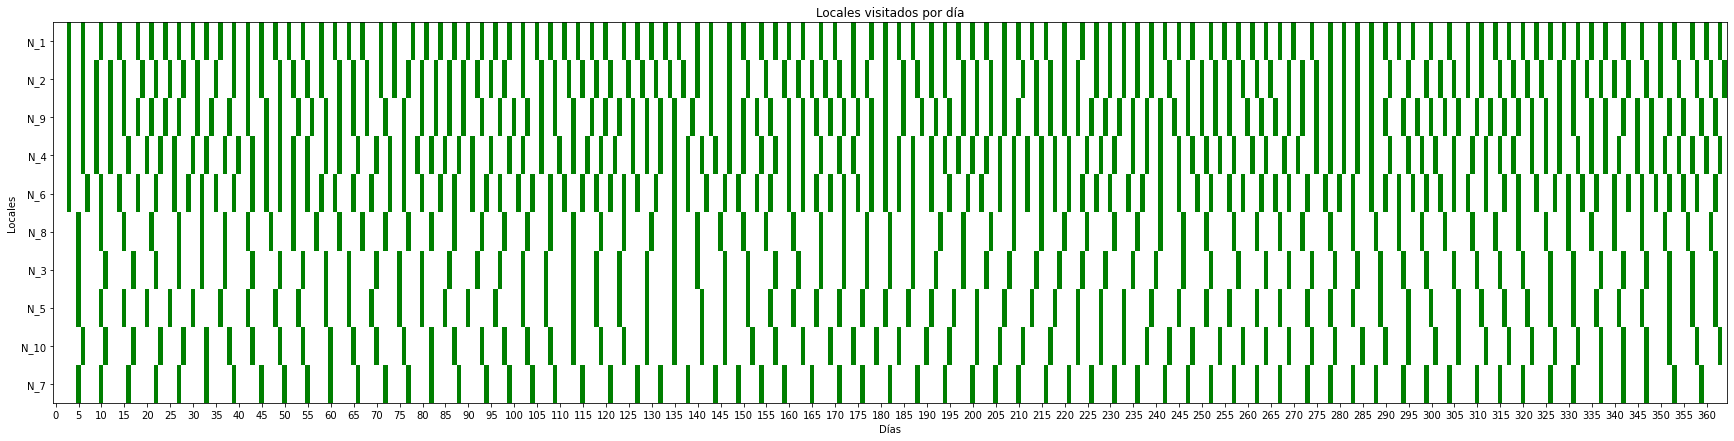

Listo n10full.xlsx con demanda c
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 51.12634555814289 | costo_r: 971.9920810235781
Tiempo: 4 | Ruta: ['N_0', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 595.0226886430466
Tiempo: 5 | Ruta: ['N_0', 'N_10', 'N_5', 'N_8', 'N_7', 'N_3', 'N_0'] | costo_SO: 0 | costo_r: 1200.5007576237413
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 971.9920810235781
Tiempo: 7 | Ruta: ['N_0', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 595.0226886430466
Tiempo: 8 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 9 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 118.646

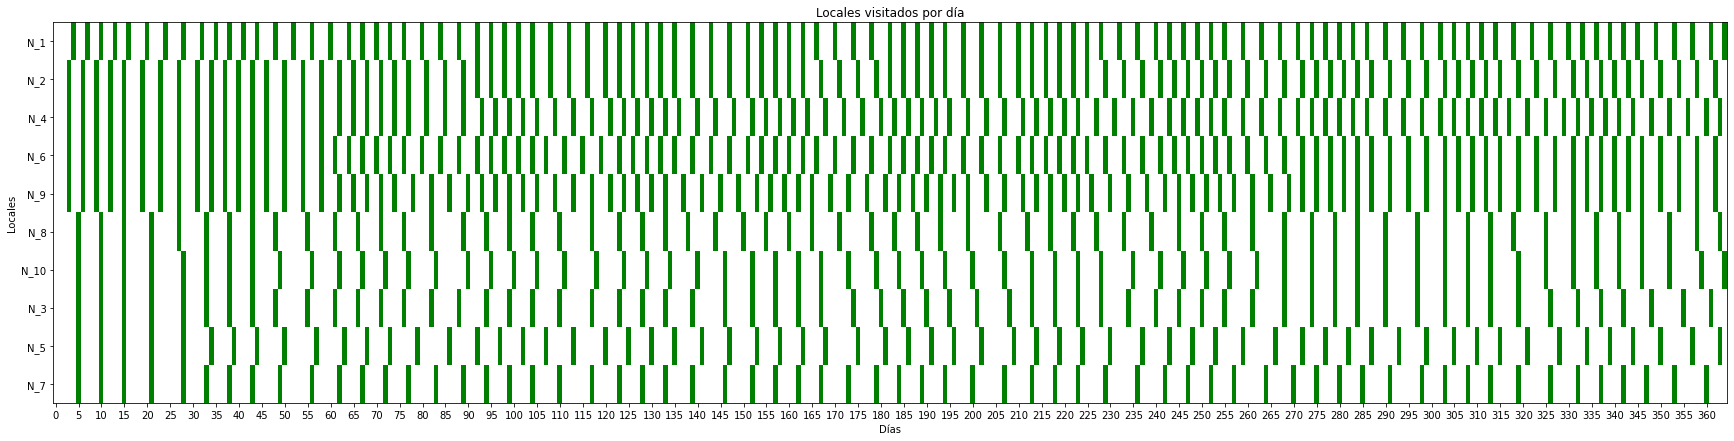

Listo n10full.xlsx con demanda o
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Tiempo: 0 | Ruta: ['N_0', 'N_6', 'N_11', 'N_9', 'N_10', 'N_15', 'N_14', 'N_7', 'N_3', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2135.8110939498356
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_11', 'N_9', 'N_10', 'N_0'] | costo_SO: 165.1390316537115 | costo_r: 682.2430909012169
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_7', 'N_19', 'N_18', 'N_1', 'N_20', 'N_8', 'N_11', 'N_4', 'N_5', 'N_0'] | costo_SO: 190.465863175315 | costo_r: 1731.448262716515
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_11', 'N_10', 'N_15', 'N_14', 'N_3', 'N_12', 'N_16', 'N_17', 'N_8', 'N_13', 'N_2', 'N_0'] | costo_SO: 36.57407200842644 | costo_r: 1693.0526013991614
Tiempo: 4 | Ruta: ['N_0', 'N_9', 'N_11', 'N_4', 'N_18', '

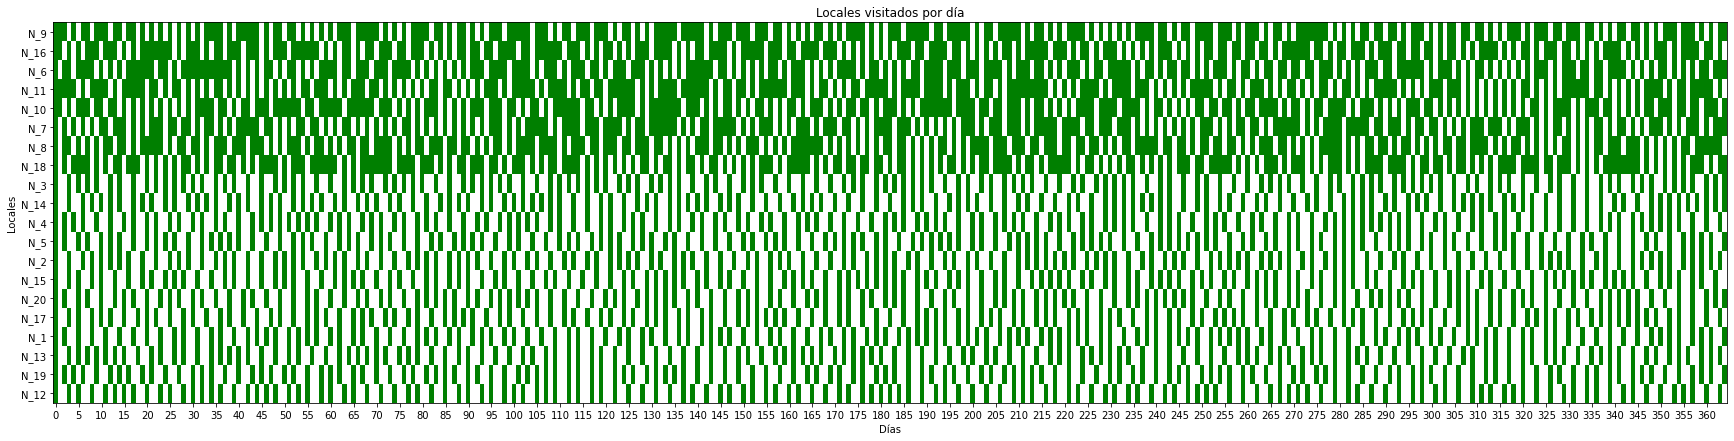

Listo n20empty.xlsx con demanda n
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Tiempo: 0 | Ruta: ['N_0', 'N_6', 'N_10', 'N_15', 'N_14', 'N_7', 'N_3', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_9', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2158.4732629202285
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1085.504912980615
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_7', 'N_14', 'N_15', 'N_10', 'N_9', 'N_6', 'N_16', 'N_19', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2031.6592237929863
Tiempo: 3 | Ruta: ['N_0', 'N_12', 'N_16', 'N_18', 'N_8', 'N_11', 'N_6', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1115.7449758514044
Tiempo: 4 | Ruta: ['N_0', 'N_3', 'N_15', 'N_7', 'N_14', 'N

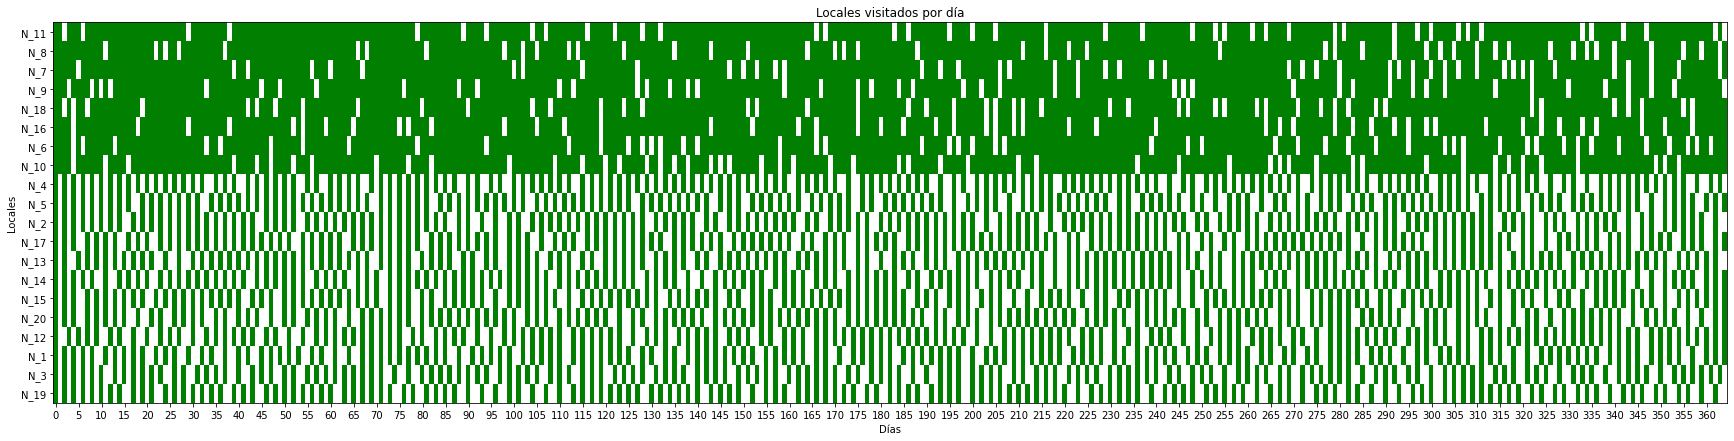

Listo n20empty.xlsx con demanda c
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_10', 'N_15', 'N_7', 'N_14', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_6', 'N_9', 'N_11', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2148.172867692255
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_0'] | costo_SO: 404.54266799159967 | costo_r: 94.02127418834527
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_10', 'N_15', 'N_7', 'N_3', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_4', 'N_5', 'N_0'] | costo_SO: 50.88859838947608 | costo_r: 2140.4036630437204
Tiempo: 3 | Ruta: ['N_0', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1098.7918473709155
Tiempo: 4 | Ruta: ['N_0', 'N_3', 'N_10', 'N_15', 'N_7', 

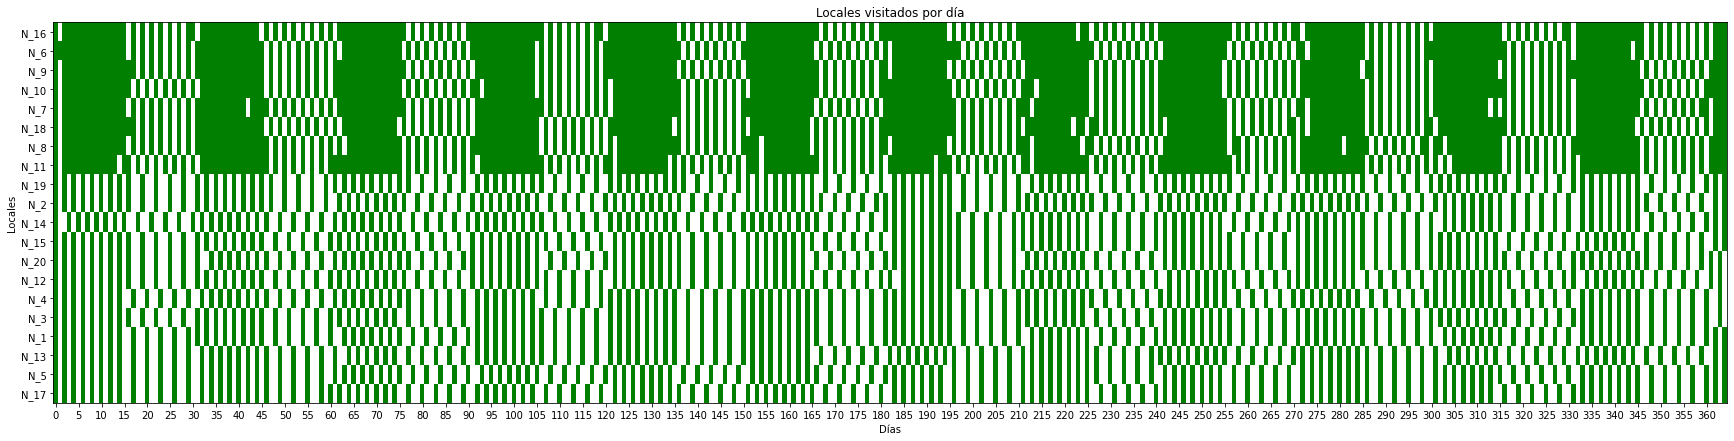

Listo n20empty.xlsx con demanda o
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


Tiempo: 0 | Ruta: ['N_0', 'N_8', 'N_0'] | costo_SO: 167.26871649618369 | costo_r: 326.4659247149693
Tiempo: 1 | Ruta: ['N_0', 'N_3', 'N_7', 'N_10', 'N_9', 'N_6', 'N_16', 'N_12', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2021.143045844031
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_8', 'N_9', 'N_10', 'N_15', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 964.5446871831386
Tiempo: 3 | Ruta: ['N_0', 'N_10', 'N_7', 'N_3', 'N_12', 'N_19', 'N_16', 'N_18', 'N_2', 'N_13', 'N_20', 'N_8', 'N_6', 'N_11', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1926.9830575130522
Tiempo: 4 | Ruta: ['N_0', 'N_16', 'N_18', 'N_17', 'N_1', 'N_4', 'N_9', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 0 | costo_

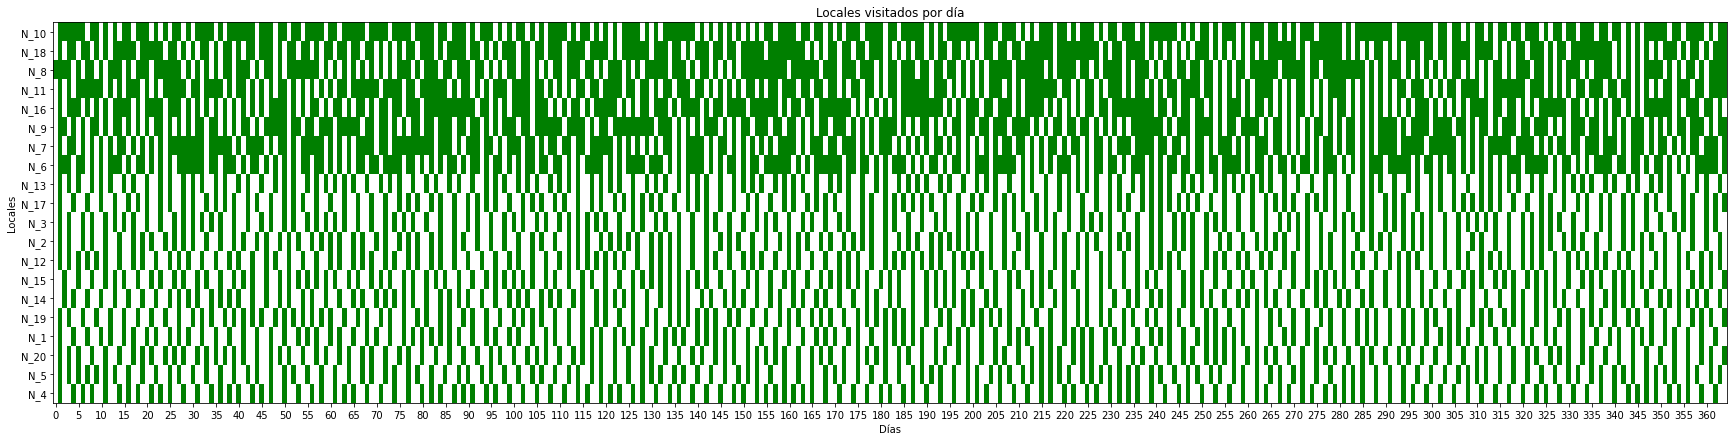

Listo n20estandar.xlsx con demanda n
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


Tiempo: 0 | Ruta: ['N_0', 'N_6', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1063.4114459577372
Tiempo: 1 | Ruta: ['N_0', 'N_3', 'N_6', 'N_16', 'N_12', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_9', 'N_10', 'N_7', 'N_14', 'N_15', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2239.263845020074
Tiempo: 2 | Ruta: ['N_0', 'N_18', 'N_8', 'N_11', 'N_9', 'N_10', 'N_7', 'N_0'] | costo_SO: 77.90090633670954 | costo_r: 998.9637136227336
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_17', 'N_16', 'N_19', 'N_2', 'N_8', 'N_20', 'N_13', 'N_5', 'N_4', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0'] | costo_SO: 82.23375653814723 | costo_r: 2008.100859217306
Tiempo: 4 | Ruta: ['N_0', 'N_

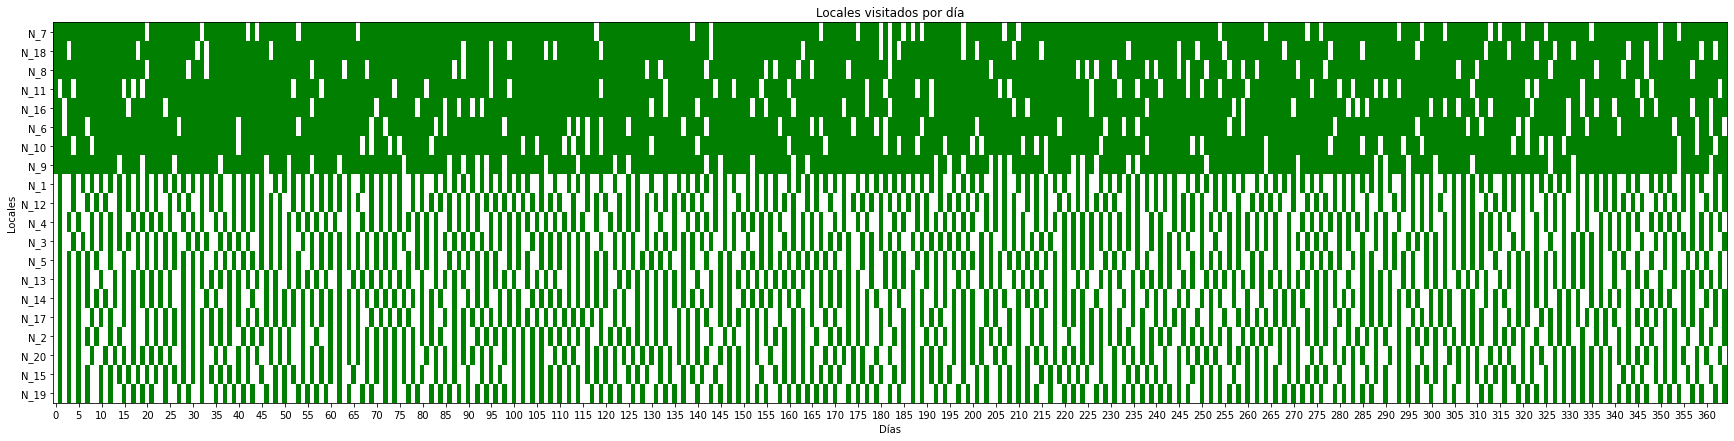

Listo n20estandar.xlsx con demanda c
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 292.04913843443455 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_19', 'N_18', 'N_17', 'N_2', 'N_13', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 137.11138014370502 | costo_r: 1511.8016619090274
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_1', 'N_18', 'N_16', 'N_12', 'N_7', 'N_15', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1894.374137868609
Tiempo: 3 | Ruta: ['N_0', 'N_16', 'N_19', 'N_18', 'N_17', 'N_2', 'N_13', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1511.8016619090274
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_9', 'N_10', 'N_15', 'N_7', 'N_3', 'N_12', 'N_16', 'N_18', 

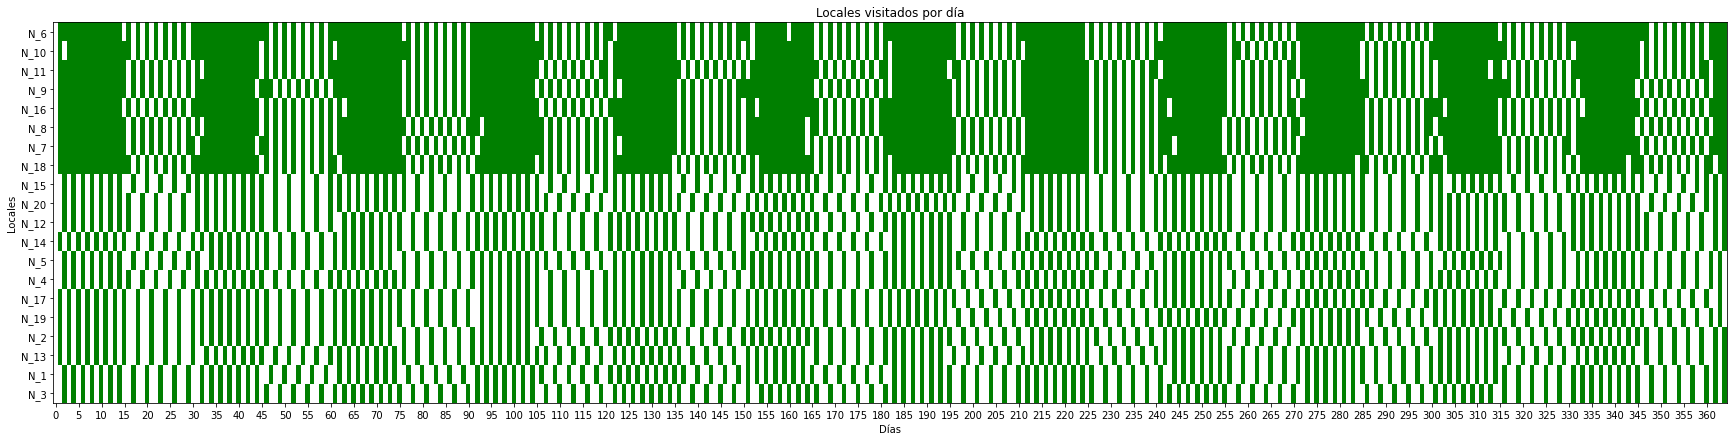

Listo n20estandar.xlsx con demanda o
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_18', 'N_8', 'N_6', 'N_9', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1045.8551485060916
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_14', 'N_15', 'N_10', 'N_9', 'N_11', 'N_8', 'N_16', 'N_2', 'N_13', 'N_5', 'N_0'] | costo_SO: 48.040987210260084 | costo_r: 1862.410714629598
Tiempo: 3 | Ruta: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_17', 'N_16', 'N_12', 'N_19', 'N_18', 'N_1', 'N_8', 'N_20', 'N_4', 'N_0'] | costo_SO: 0 | costo_r: 1308.9975257807105
Tiempo: 4 | Ruta: ['N_0', 'N_14', 'N_7', 'N_10', 'N_5', 'N_13', 'N_8', 'N_11', 'N_9', 'N_6', 'N_16', 'N_18', 'N_0'] | costo_SO: 0 | costo_r: 1570.120754247538
Tiempo: 5 | Ruta: ['N

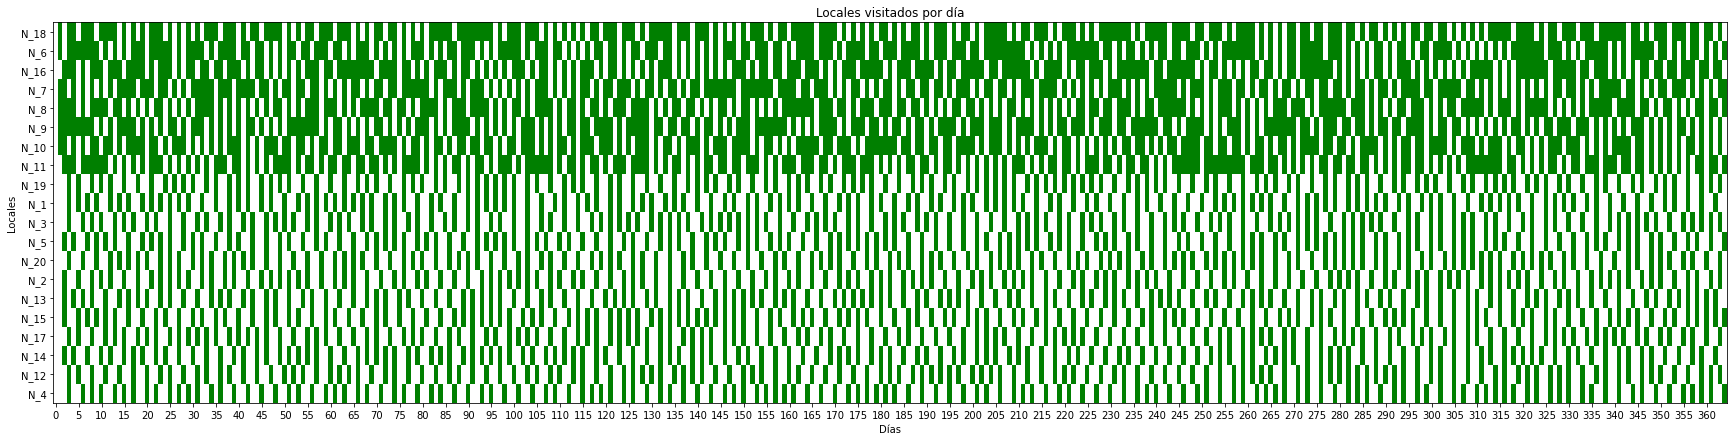

Listo n20full.xlsx con demanda n
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 862.2700518152901
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_7', 'N_14', 'N_15', 'N_10', 'N_6', 'N_16', 'N_19', 'N_18', 'N_17', 'N_1', 'N_13', 'N_8', 'N_11', 'N_9', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2032.1028994845228
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_4', 'N_8', 'N_20', 'N_2', 'N_18', 'N_16', 'N_12', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1489.3244075585092
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_13', 'N_1', 'N_18', 'N_19', 'N_16', 'N_3', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1514.0

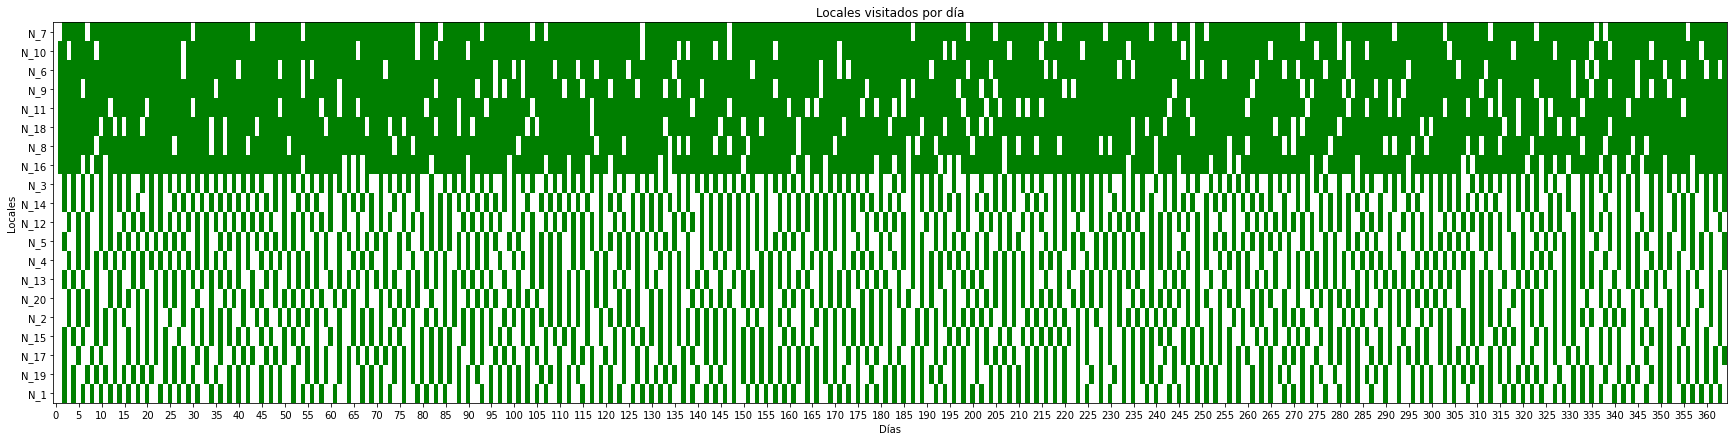

Listo n20full.xlsx con demanda c
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_11', 'N_0'] | costo_SO: 278.72092806040496 | costo_r: 218.8880992653552
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_1', 'N_18', 'N_16', 'N_12', 'N_3', 'N_10', 'N_7', 'N_14', 'N_15', 'N_5', 'N_0'] | costo_SO: 156.9282422748878 | costo_r: 1897.442923300528
Tiempo: 3 | Ruta: ['N_0', 'N_16', 'N_19', 'N_18', 'N_17', 'N_2', 'N_13', 'N_20', 'N_8', 'N_4', 'N_9', 'N_6', 'N_10', 'N_7', 'N_0'] | costo_SO: 110.21432686663775 | costo_r: 1672.276366558748
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_11', 'N_9', 'N_10', 'N_15', 'N_14', 'N_7', 'N_3', 'N_12', 'N_16', 'N_18', 'N_1', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1839

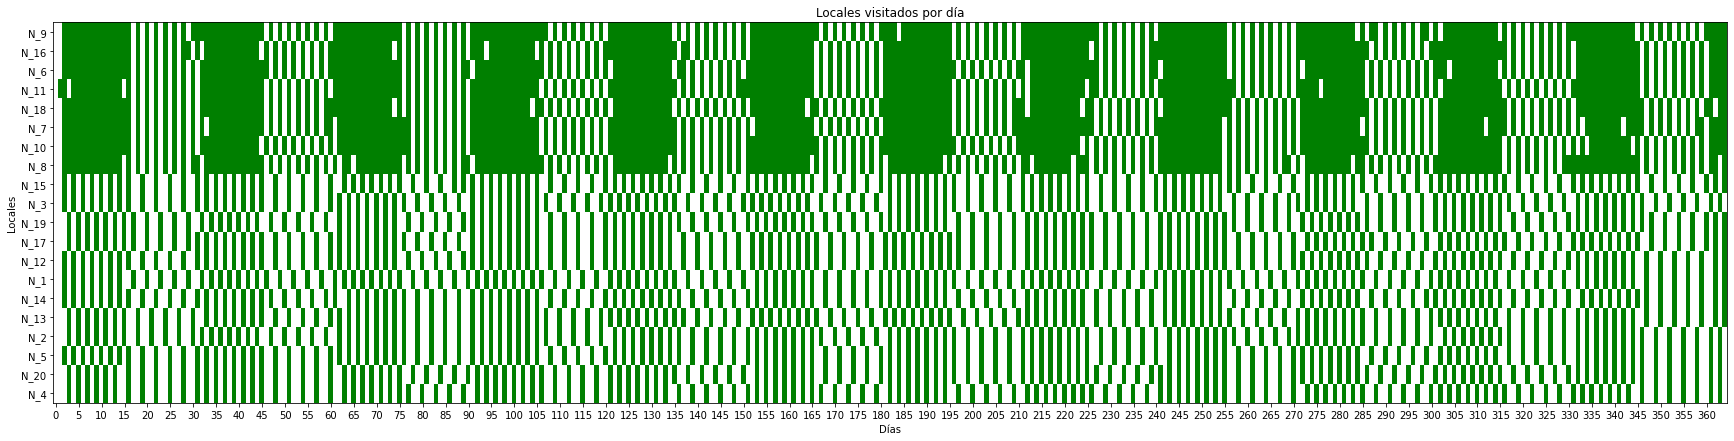

Listo n20full.xlsx con demanda o
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_23', 'N_7', 'N_10', 'N_1', 'N_26', 'N_20', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_13', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2541.631730777506
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_10', 'N_11', 'N_19', 'N_27', 'N_4', 'N_0'] | costo_SO: 168.0161275731218 | costo_r: 1262.7368202841037
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_20', 'N_21', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_16', 'N_25', 'N_19', 'N_27', 'N_12', 'N_15', 'N_17', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0'] | costo_SO: 126.38786992814299 | costo_r: 1814.4379302742532
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_26', 'N_1

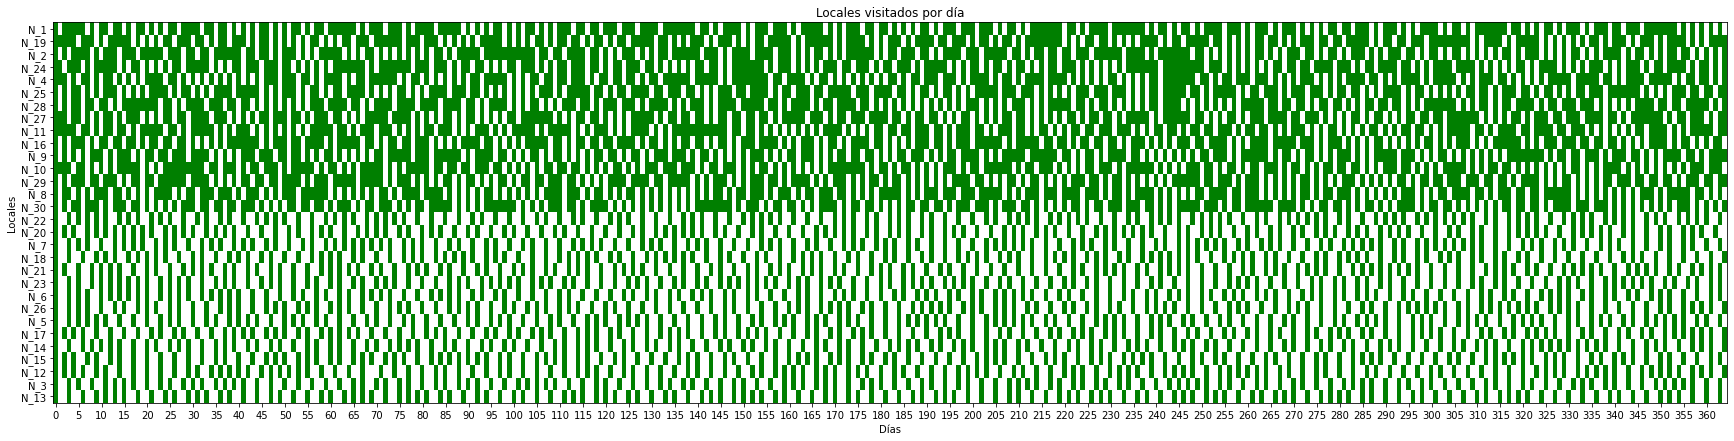

Listo n30empty.xlsx con demanda n
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_20', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_13', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_26', 'N_1', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2633.191141195776
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_1', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_19', 'N_25', 'N_27', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 1550.8927629985756
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_20', 'N_26', 'N_1', 'N_10', 'N_7', 'N_23', 'N_25', 'N_19', 'N_6', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_5', 'N_27', 'N_18', 'N_21', 'N_29', 'N_13', 'N_4', 'N_22', 'N_2', 'N_9', 'N_8', 'N_14', 'N_16', '

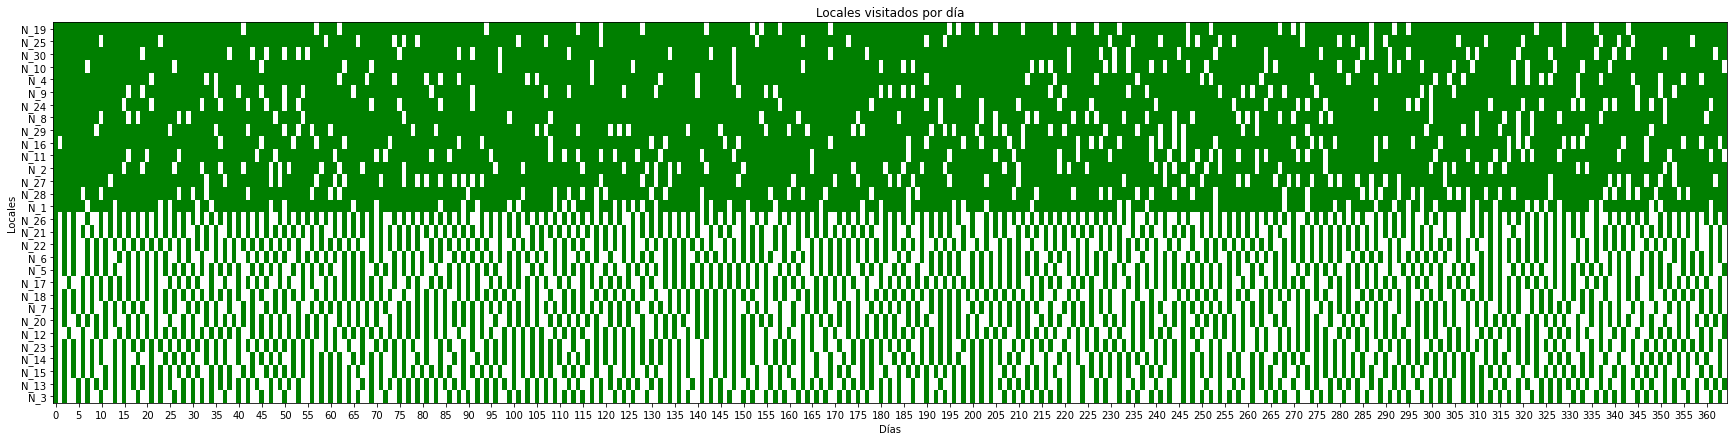

Listo n30empty.xlsx con demanda c
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_20', 'N_26', 'N_1', 'N_10', 'N_7', 'N_23', 'N_25', 'N_19', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_13', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2507.1658742691875
Tiempo: 1 | Ruta: ['N_0', 'N_10', 'N_30', 'N_27', 'N_2', 'N_9', 'N_8', 'N_0'] | costo_SO: 245.42842295567573 | costo_r: 1118.2223614196191
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_26', 'N_20', 'N_24', 'N_11', 'N_28', 'N_7', 'N_30', 'N_15', 'N_18', 'N_2', 'N_21', 'N_22', 'N_29', 'N_4', 'N_13', 'N_8', 'N_14', 'N_19', 'N_25', 'N_16', 'N_0'] | costo_SO: 396.1381833228137 | costo_r: 1970.0654324390575
Tiempo: 3 | Ruta: ['N_0', 'N_2

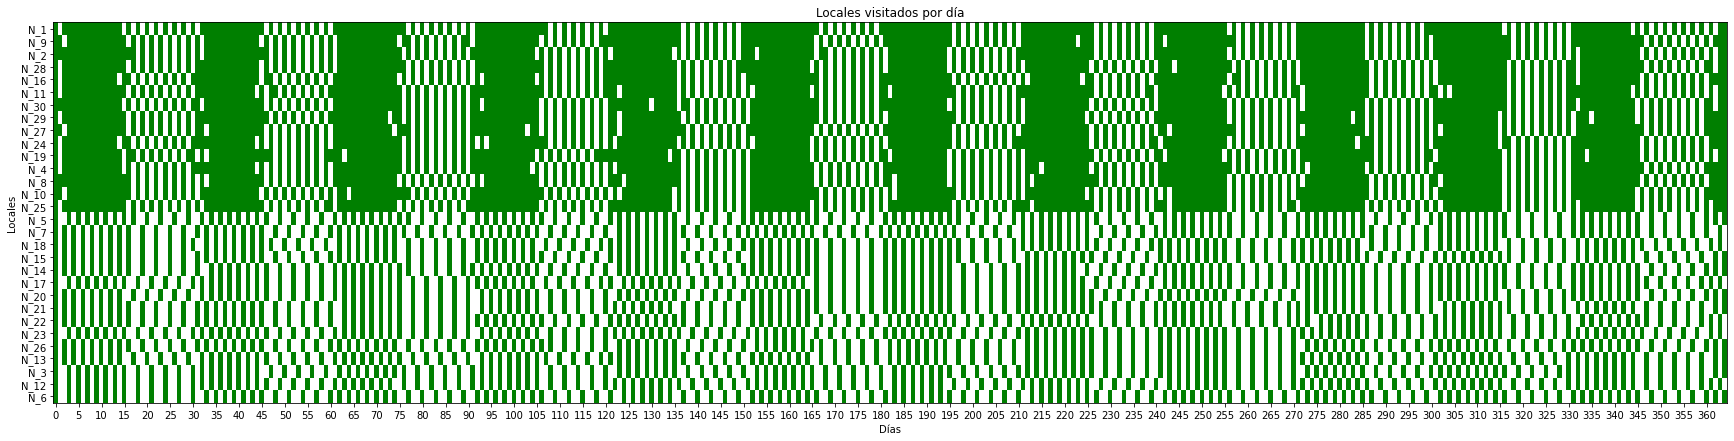

Listo n30empty.xlsx con demanda o
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


Tiempo: 0 | Ruta: ['N_0', 'N_2', 'N_4', 'N_0'] | costo_SO: 507.1062581950673 | costo_r: 803.2790131849022
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_26', 'N_1', 'N_10', 'N_28', 'N_11', 'N_3', 'N_30', 'N_23', 'N_6', 'N_27', 'N_22', 'N_29', 'N_13', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_16', 'N_0'] | costo_SO: 137.79358623803265 | costo_r: 2300.3695681119157
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_20', 'N_7', 'N_17', 'N_15', 'N_30', 'N_12', 'N_5', 'N_18', 'N_2', 'N_21', 'N_29', 'N_4', 'N_8', 'N_25', 'N_16', 'N_0'] | costo_SO: 41.637257188690086 | costo_r: 1872.0084165453218
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_26', 'N_1', 'N_10', 'N_23', 'N_16', 'N_14', 'N_19', 'N_25', 'N_6', 'N_30', 'N_28', 'N_11'

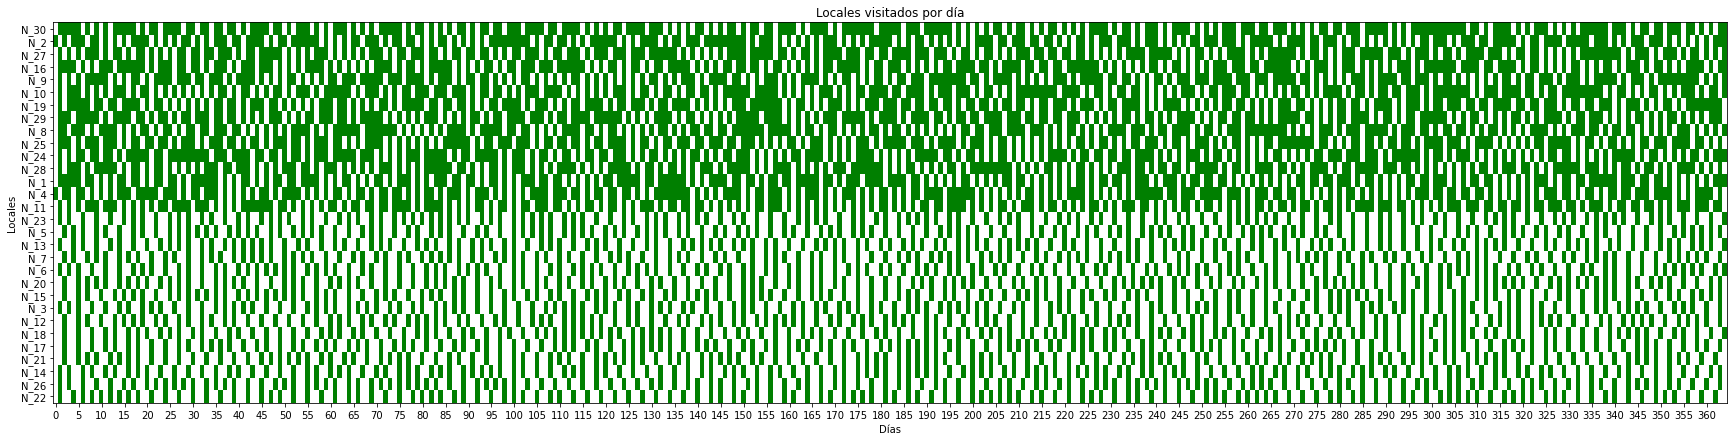

Listo n30estandar.xlsx con demanda n
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_1', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_16', 'N_25', 'N_19', 'N_27', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 1747.6190196632908
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_12', 'N_27', 'N_5', 'N_3', 'N_20', 'N_26', 'N_1', 'N_10', 'N_23', 'N_16', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_22', 'N_29', 'N_4', 'N_13', 'N_0'] | costo_SO: 0 | costo_r: 2421.0384880015436
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_10', 'N_7', 'N_11', 'N_30', 'N_18', 'N_2', 'N_29', 'N_4', 'N_9', 'N_8', 'N_19', 'N_25', 'N_0'] | costo_SO: 0 | costo_r: 1591.8350738305537
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_10', 'N_17', 

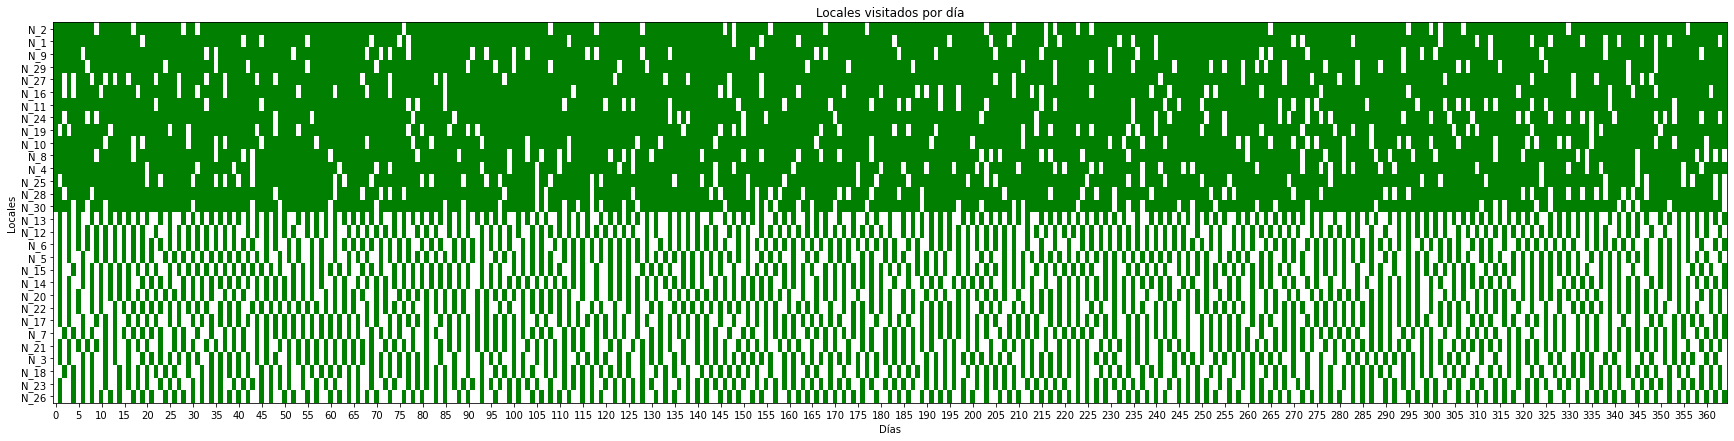

Listo n30estandar.xlsx con demanda c
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 237.97358431156317 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_11', 'N_28', 'N_30', 'N_17', 'N_12', 'N_27', 'N_5', 'N_18', 'N_2', 'N_29', 'N_4', 'N_9', 'N_8', 'N_19', 'N_25', 'N_16', 'N_23', 'N_10', 'N_1', 'N_0'] | costo_SO: 130.13556398353035 | costo_r: 1896.3268276918163
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_1', 'N_26', 'N_20', 'N_3', 'N_11', 'N_28', 'N_7', 'N_30', 'N_15', 'N_21', 'N_22', 'N_4', 'N_13', 'N_9', 'N_8', 'N_14', 'N_19', 'N_6', 'N_16', 'N_0'] | costo_SO: 221.66840507592065 | costo_r: 2025.9674382532503
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_11', 'N_28', 'N_30', 'N_17', 'N_12', 'N_27', 'N_5', 'N_18', 'N_2', 'N_

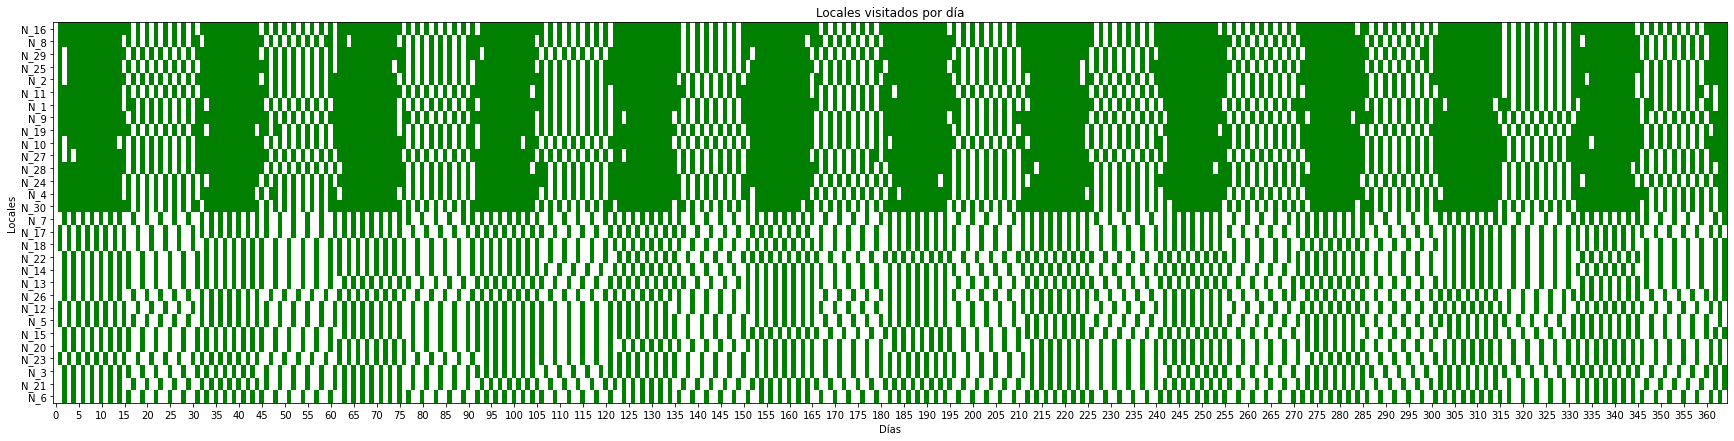

Listo n30estandar.xlsx con demanda o
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_20', 'N_10', 'N_23', 'N_25', 'N_19', 'N_15', 'N_28', 'N_3', 'N_18', 'N_2', 'N_21', 'N_22', 'N_4', 'N_9', 'N_8', 'N_0'] | costo_SO: 260.14878830579175 | costo_r: 1951.8553493266659
Tiempo: 3 | Ruta: ['N_0', 'N_7', 'N_30', 'N_17', 'N_6', 'N_16', 'N_14', 'N_13', 'N_29', 'N_5', 'N_27', 'N_12', 'N_11', 'N_24', 'N_1', 'N_26', 'N_0'] | costo_SO: 0 | costo_r: 1637.0392031263987
Tiempo: 4 | Ruta: ['N_0', 'N_20', 'N_3', 'N_15', 'N_23', 'N_25', 'N_19', 'N_8', 'N_21', 'N_0'] | costo_SO: 82.92410925656955 | cost

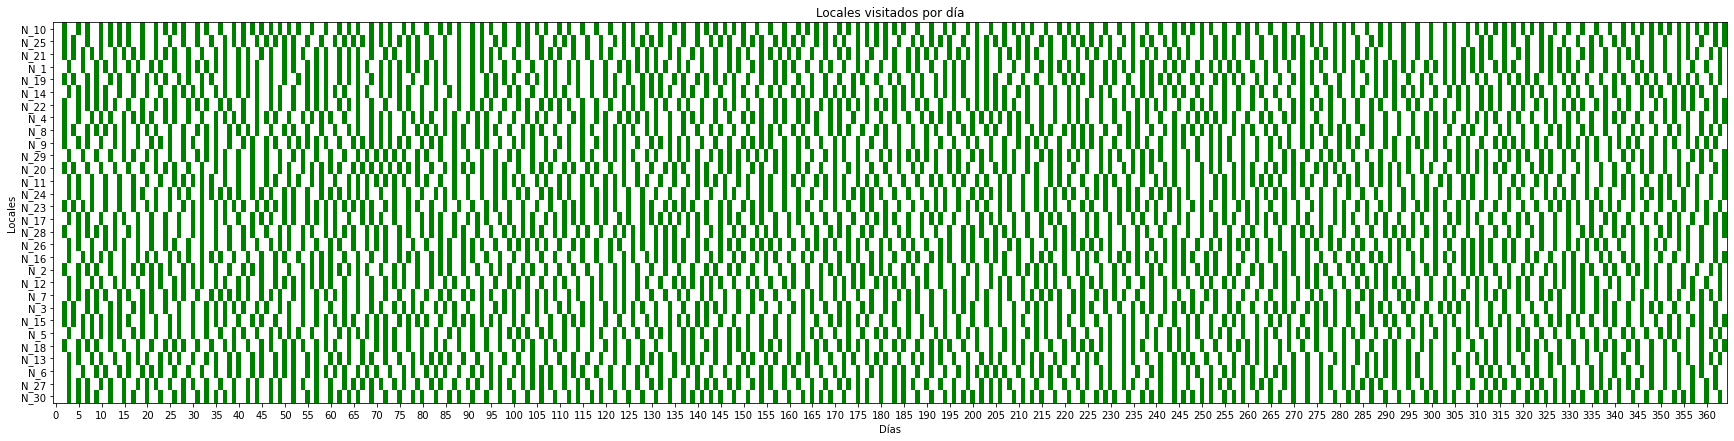

Listo n30full.xlsx con demanda n
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_1', 'N_26', 'N_20', 'N_11', 'N_28', 'N_30', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_13', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_6', 'N_17', 'N_15', 'N_23', 'N_16', 'N_0'] | costo_SO: 28.5783968787548 | costo_r: 2220.5627316744
Tiempo: 3 | Ruta: ['N_0', 'N_3', 'N_5', 'N_7', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 601.9990753863187
Tiempo: 4 | Ruta: ['N_0', 'N_1', 'N_26', 'N_20', 'N_24', 'N_11', 'N_28', 'N_30', 'N_18', 'N_2', 'N_21', 'N_22', 'N_29', 'N_13', 'N_8', 'N_14'

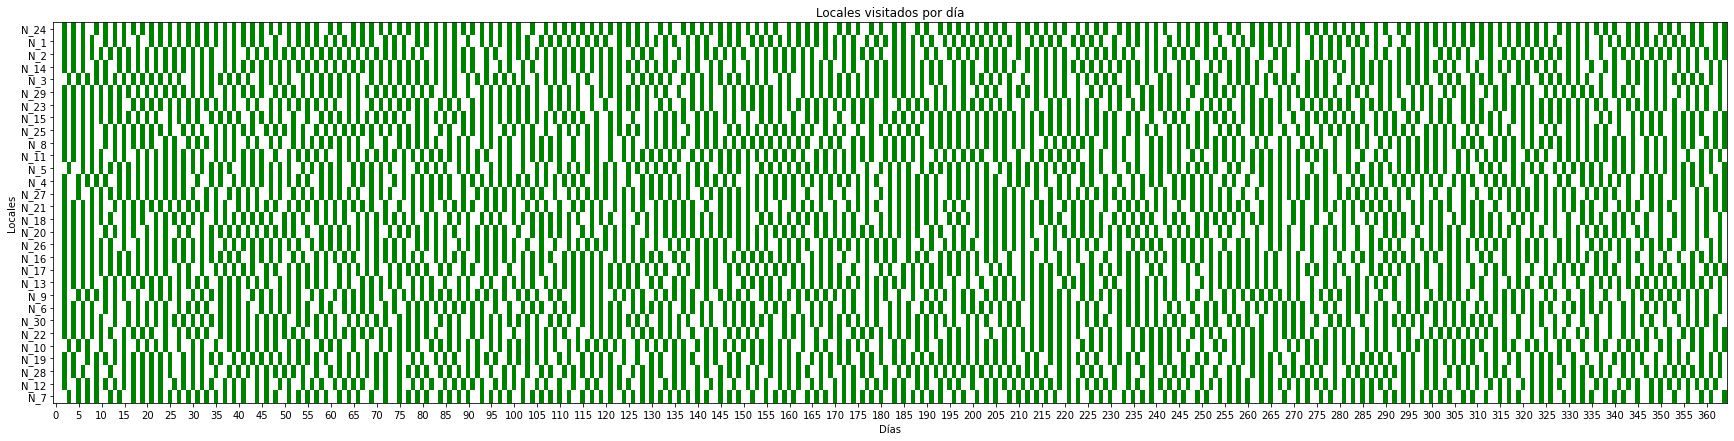

Listo n30full.xlsx con demanda c
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_3', 'N_11', 'N_28', 'N_5', 'N_2', 'N_4', 'N_18', 'N_27', 'N_19', 'N_25', 'N_15', 'N_30', 'N_17', 'N_7', 'N_23', 'N_16', 'N_0'] | costo_SO: 339.4087051032673 | costo_r: 2033.006561703637
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_20', 'N_26', 'N_10', 'N_6', 'N_12', 'N_21', 'N_22', 'N_29', 'N_13', 'N_9', 'N_8', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1777.523361989954
Tiempo: 4 | Ruta: ['N_0', 'N_1', 'N_5', 'N_2', 'N_18', 'N_27', 'N_15', 'N_17', 'N_30', 'N_3', 'N_11', 'N_28', 'N_7', 'N_23', 'N_25', 'N_19

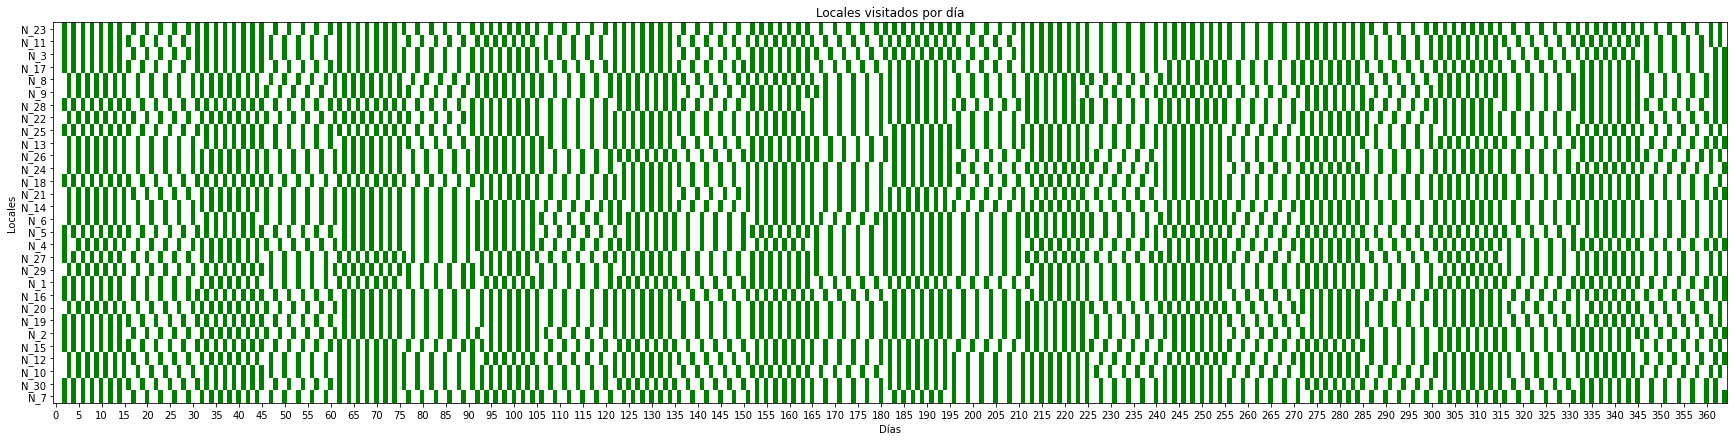

Listo n30full.xlsx con demanda o


In [3]:
n_s = [10,20,30]
inicial = ['empty', 'estandar', 'full']
demandas = ['n', 'c', 'o']
datos_R_sim = {}
df_costos = pd.DataFrame()
for n in n_s:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output_tablero = f'plots//tablero_R_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)
            #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
            rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30)
            datos_R_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R,
                                            'costos': costos_R, 'demanda': dems_R}
            costos_consolidados = calcular_costo_consolidado(costos_R, inventarios_R)
            df_costos = pd.concat([df_costos, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1

            df_rutas = generar_df(rutas_R, N)
            plotear_tablero_visitas(df_rutas, guardar = True, nombre = output_tablero)
            print (f'Listo {file_name} con demanda {dem}')

df_costos.to_csv('costos_R.csv')

json.dump(datos_R_sim, open('datos_R_sim.json', 'w'))

### Simulación P



Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_1', 'N_9', 'N_8', 'N_2', 'N_4', 'N_6', 'N_6', 'N_2', 'N_5', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_1', 'N_9', 'N_8', 'N_2', 'N_4', 'N_6', 'N_5', 'N_0'] | costo_SO: 157.67545785669674 | costo_r: 2070.60856553062


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_3', 'N_7', 'N_0'], costo SO = 3727970.1670826864
Final LS: [['N_0', 'N_5', 'N_4', 'N_5', 'N_10', 'N_2', 'N_7']], costo SO = 1432625.169624169
Tiempo: 1 | Ruta: ['N_0', 'N_5', 'N_4', 'N_10', 'N_2', 'N_7', 'N_0'] | costo_SO: 10.753409739881045 | costo_r: 1077.722779869391


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0'], costo SO = 1444163.9233842646
Final LS: [['N_0', 'N_10', 'N_9', 'N_4', 'N_9', 'N_7', 'N_8']], costo SO = 0.0
Tiempo: 2 | Ruta: ['N_0', 'N_10', 'N_9', 'N_4', 'N_7', 'N_8', 'N_0'] | costo_SO: 189.92145194846972 | costo_r: 1152.7714547328537


Ini

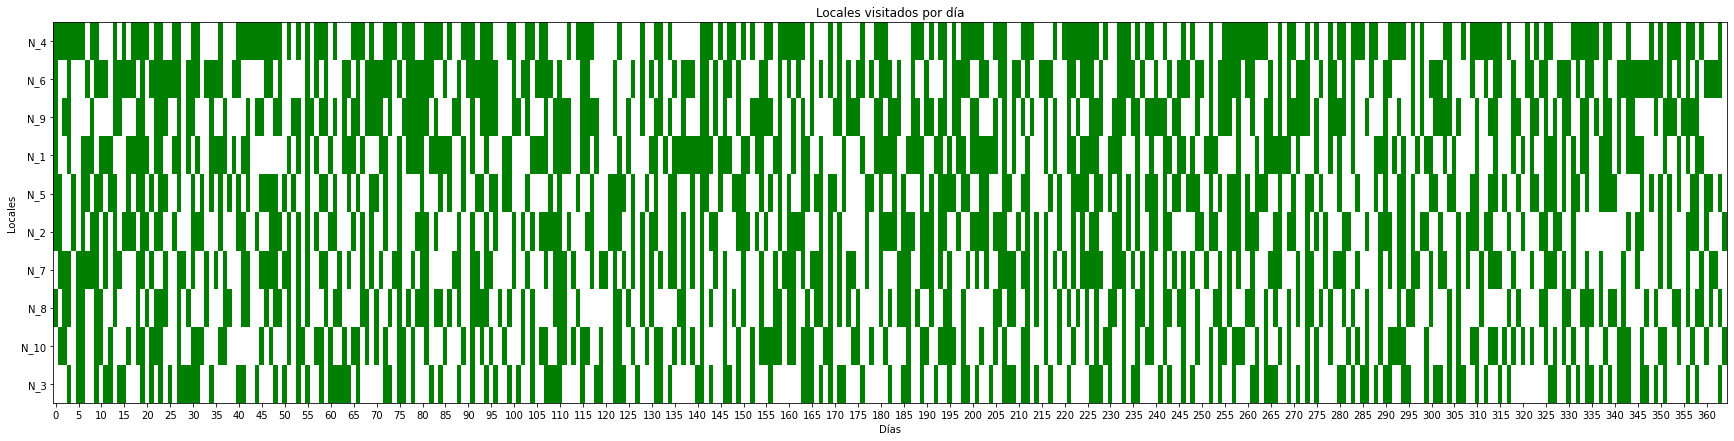

Listo n10empty.xlsx con demanda n


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_7', 'N_9', 'N_4', 'N_1', 'N_2', 'N_3', 'N_8', 'N_2', 'N_1', 'N_3', 'N_6', 'N_7', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_7', 'N_9', 'N_4', 'N_1', 'N_2', 'N_3', 'N_8', 'N_6', 'N_0'] | costo_SO: 131.101502736363 | costo_r: 1854.9126343384712


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_6', 'N_5', 'N_0'], costo SO = 837988.4237989874
Final LS: [['N_0', 'N_6', 'N_4', 'N_1', 'N_9', 'N_4', 'N_3', 'N_5']], costo SO = 0.0
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_4', 'N_1', 'N_9', 'N_3', 'N_5', 'N_0'] | costo_SO: 86.56060236311356 | costo_r: 1758.014373983192


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_7', 'N_6', 'N_0'], costo SO = 416888.234302697
Final LS: [['N_0', 'N_8', 'N_10', 'N_10', 'N_6', 'N_1', 'N_10', 'N_7', 'N_10', 'N_5', 'N_2']], costo SO = 275489.9086128614
Tiempo: 2 | 

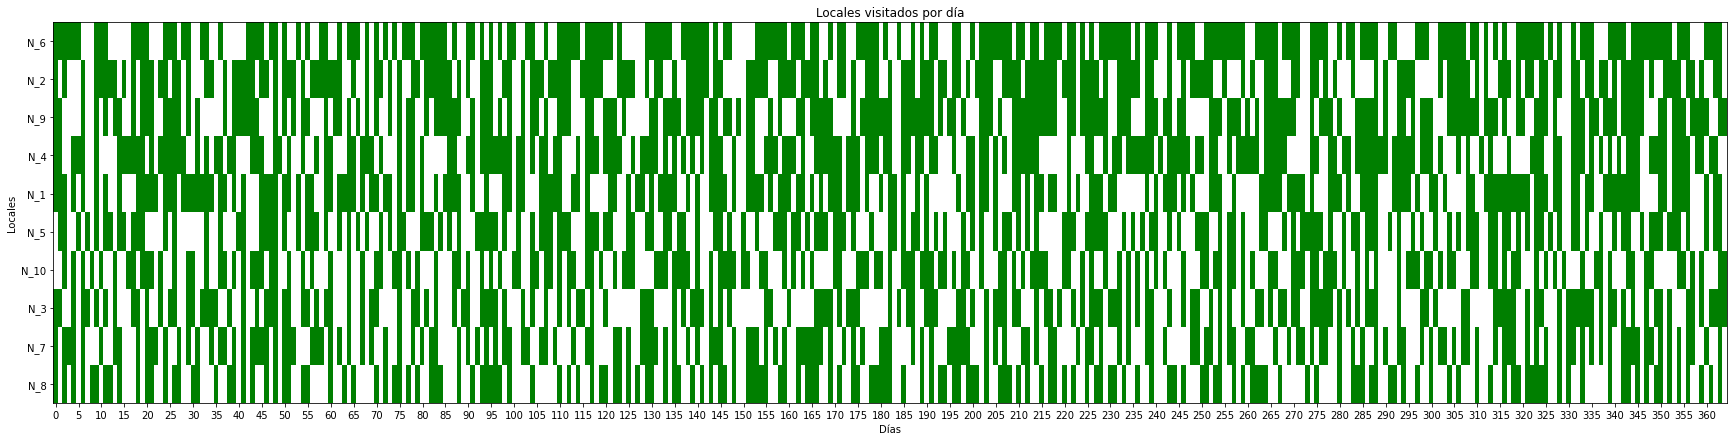

Listo n10empty.xlsx con demanda c


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_10', 'N_10', 'N_1', 'N_1', 'N_3', 'N_7', 'N_4', 'N_3', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_10', 'N_1', 'N_3', 'N_7', 'N_4', 'N_0'] | costo_SO: 288.1311012188928 | costo_r: 945.7141178436418


Inicial LS: ['N_0', 'N_9', 'N_2', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 3319564.3145045587
Final LS: [['N_0', 'N_9', 'N_9', 'N_2', 'N_4', 'N_5']], costo SO = 3155483.0490140556
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_2', 'N_4', 'N_5', 'N_0'] | costo_SO: 211.84658376523294 | costo_r: 793.2176007882006


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_0'], costo SO = 1638976.9229513025
Final LS: [['N_0', 'N_9', 'N_6', 'N_10', 'N_8', 'N_9', 'N_8', 'N_2', 'N_9', 'N_4', 'N_3']], costo SO = 791622.7428340784
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_6', 'N_10', 'N_8', 'N_2', 'N_4', 'N_3', 'N

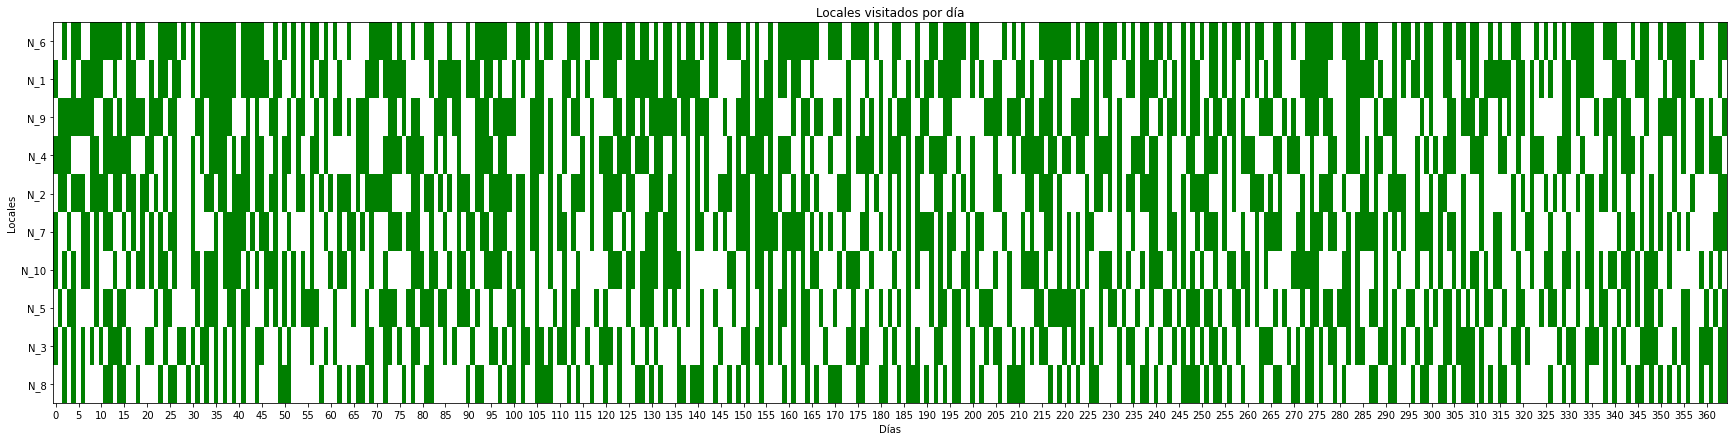

Listo n10empty.xlsx con demanda o


Inicial LS: [], costo SO = 5295236.675276443
Final LS: {0: []}, costo SO = 5295236.675276443
Tiempo: 0 | Ruta: [] | costo_SO: 169.27411135753815 | costo_r: 0


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 1423346.2454858974
Final LS: [['N_0', 'N_8', 'N_5']], costo SO = 1064872.7227266468
Tiempo: 1 | Ruta: ['N_0', 'N_8', 'N_5', 'N_0'] | costo_SO: 385.338672645785 | costo_r: 652.4026380399084


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_0'], costo SO = 751125.757033822
Final LS: {0: ['N_0', 'N_7', 'N_8', 'N_2', 'N_4', 'N_9', 'N_3', 'N_6', 'N_1', 'N_1', 'N_0']}, costo SO = 751125.757033822
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_8', 'N_2', 'N_4', 'N_9', 'N_3', 'N_6', 'N_1', 'N_0'] | costo_SO: 62.46865557372311 | costo_r: 1959.1224685519558


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_5', 'N_0'], costo SO = 754612.2603021377
Final LS: {0: ['N_0', 'N_4', 'N_

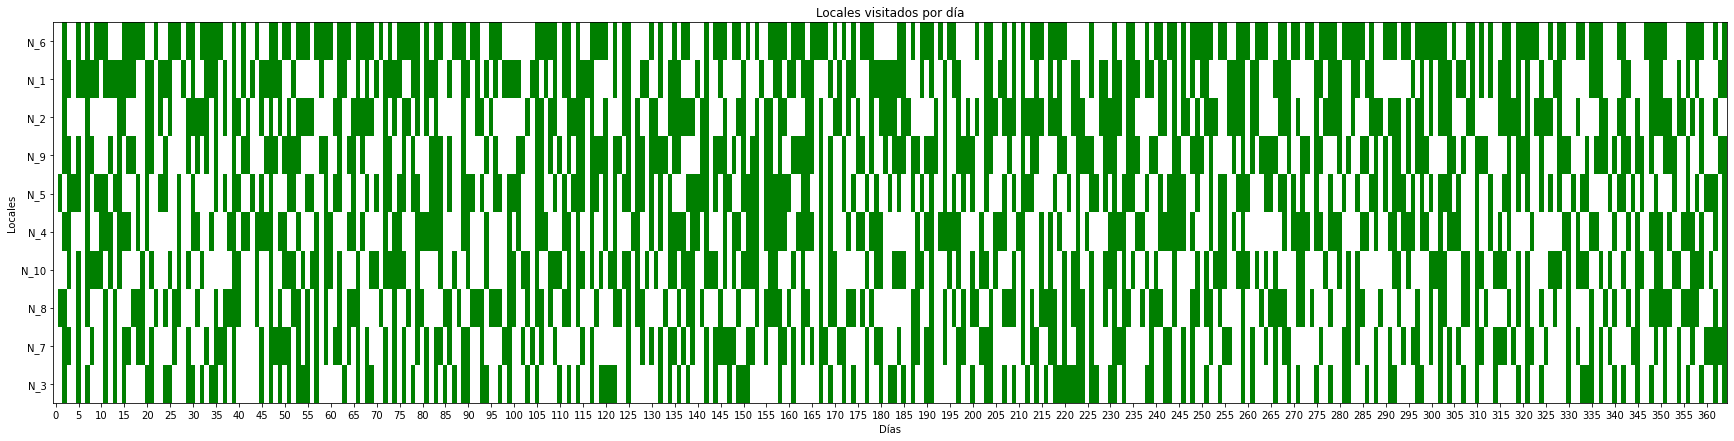

Listo n10estandar.xlsx con demanda n


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'], costo SO = 1537091.4314408258
Final LS: [['N_0', 'N_2', 'N_2', 'N_1', 'N_3', 'N_7', 'N_4', 'N_5', 'N_10']], costo SO = 1338508.0610457442
Tiempo: 0 | Ruta: ['N_0', 'N_2', 'N_1', 'N_3', 'N_7', 'N_4', 'N_5', 'N_10', 'N_0'] | costo_SO: 75.17480514712153 | costo_r: 1401.4619702395537


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_8', 'N_0'], costo SO = 2257932.926359101
Final LS: [['N_0', 'N_9', 'N_8', 'N_8']], costo SO = 2157363.161177674
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_8', 'N_0'] | costo_SO: 118.82963684841783 | costo_r: 578.1485923514134


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_6', 'N_10', 'N_4', 'N_4', 'N_6', 'N_5', 'N_1', 'N_3', 'N_7', 'N_4', 'N_1', 'N_3', 'N_0']}, costo SO = 0.0
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_10', 'N_4', 'N_5', 'N_1', 'N_3', 'N_7', 'N_0'] | costo_SO: 29.

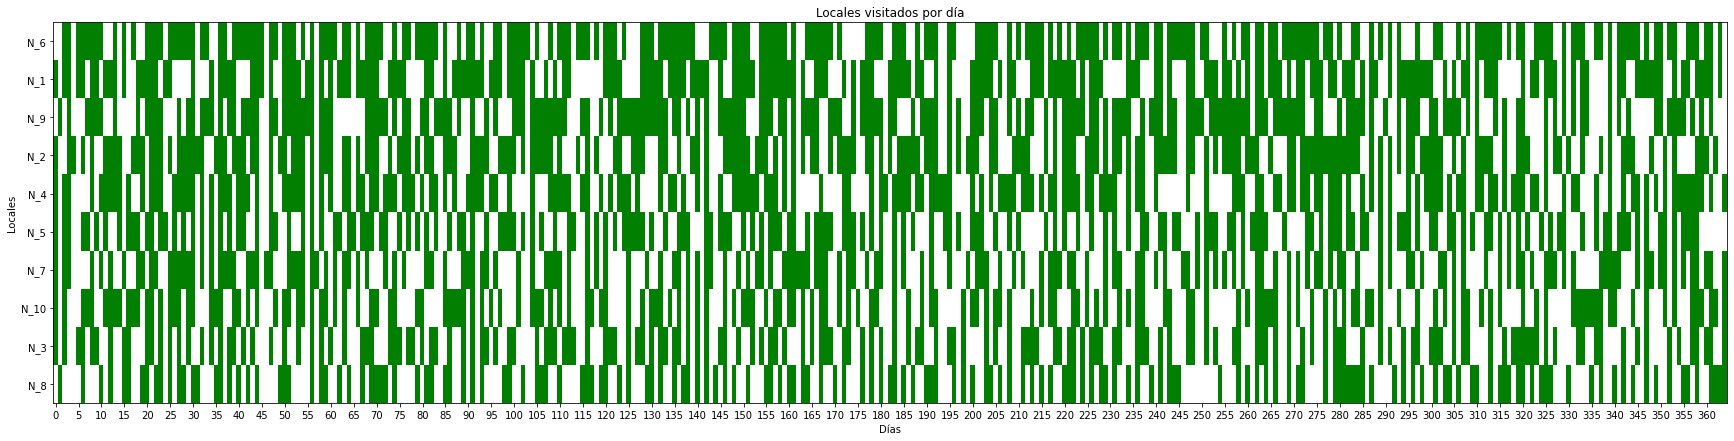

Listo n10estandar.xlsx con demanda c


Inicial LS: [], costo SO = 6727883.269560052
Final LS: {0: []}, costo SO = 6727883.269560052
Tiempo: 0 | Ruta: [] | costo_SO: 178.7727719178336 | costo_r: 0


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'], costo SO = 481514.59104869707
Final LS: {0: ['N_0', 'N_4', 'N_5', 'N_1', 'N_6', 'N_7', 'N_3', 'N_0']}, costo SO = 481514.59104869707
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_5', 'N_1', 'N_6', 'N_7', 'N_3', 'N_0'] | costo_SO: 170.65975713650957 | costo_r: 1031.505798771586


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_8', 'N_0'], costo SO = 2562217.0372089804
Final LS: [['N_0', 'N_7', 'N_3', 'N_9', 'N_9', 'N_6', 'N_10', 'N_8']], costo SO = 793472.8555408978
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_3', 'N_9', 'N_6', 'N_10', 'N_8', 'N_0'] | costo_SO: 175.3285447517727 | costo_r: 1623.5767281995672


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0'], costo SO = 2180784.6740374556
F

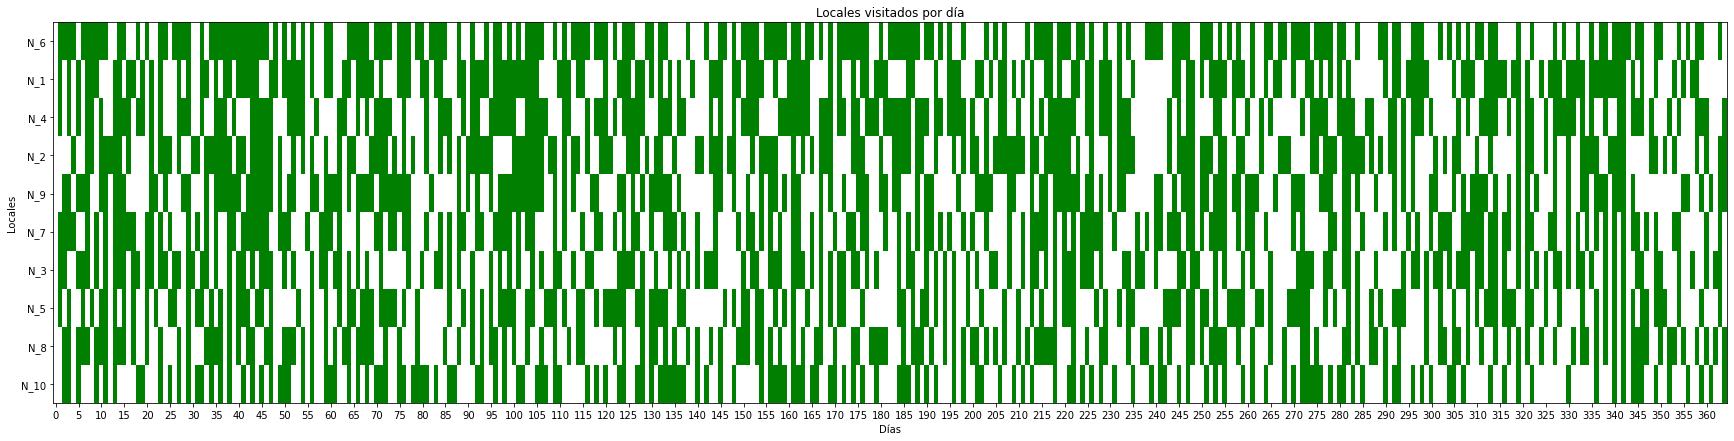

Listo n10estandar.xlsx con demanda o


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 1111954.5487087334
Final LS: {0: []}, costo SO = 1111954.5487087334
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_4', 'N_1', 'N_0'], costo SO = 871436.5140086699
Final LS: [['N_0', 'N_6', 'N_2', 'N_4']], costo SO = 385532.16758579866
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_2', 'N_4', 'N_0'] | costo_SO: 40.54411970604295 | costo_r: 883.4226964901072


Inicial LS: ['N_0', 'N_9', 'N_1', 'N_0'], costo SO = 267901.7872335825
Final LS: {0: ['N_0', 'N_9', 'N_0']}, costo SO = 267901.7872335825
Tiempo: 4 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 40.15077617832552 | costo_r: 182.5705343148231


Inicial LS: ['N_0', 'N_10', 'N_1', 'N_3', 'N_5', 'N_0'], costo SO = 602108.7399814321
Fin

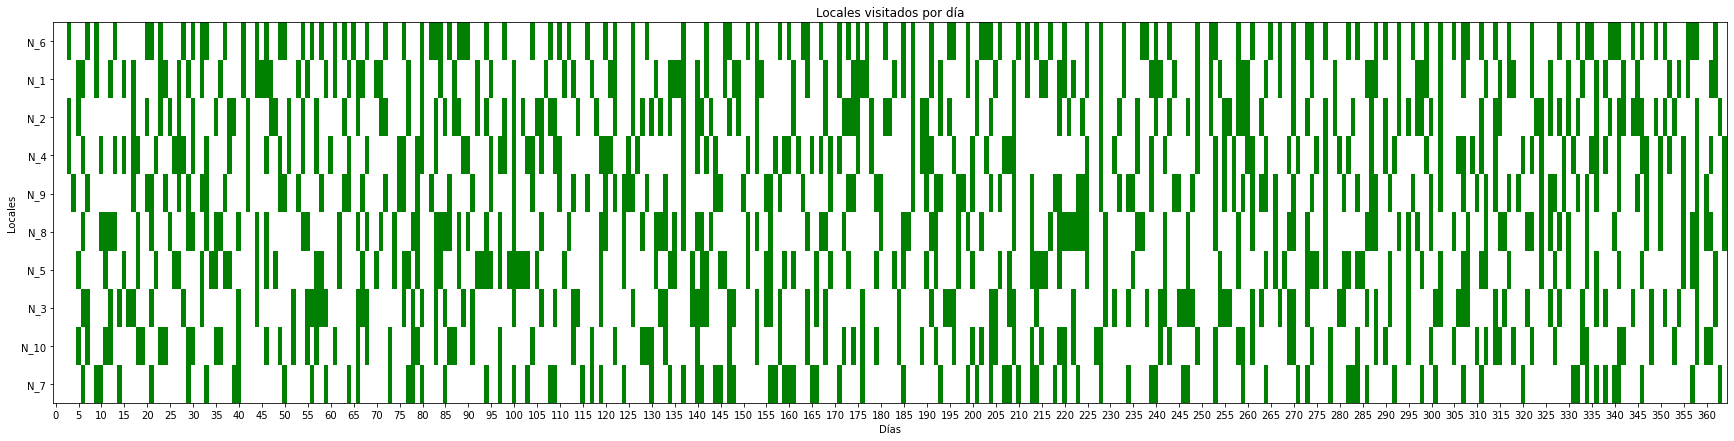

Listo n10full.xlsx con demanda n


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 833062.3893378748
Final LS: {0: []}, costo SO = 833062.3893378748
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_8', 'N_2', 'N_5', 'N_9', 'N_5', 'N_6', 'N_0']}, costo SO = 0.0
Tiempo: 3 | Ruta: ['N_0', 'N_8', 'N_2', 'N_5', 'N_9', 'N_6', 'N_0'] | costo_SO: 43.439550391852194 | costo_r: 1730.0570471173683


Inicial LS: ['N_0', 'N_4', 'N_1', 'N_0'], costo SO = 369674.56367023225
Final LS: [['N_0', 'N_2', 'N_2', 'N_7', 'N_2', 'N_4']], costo SO = 0.0
Tiempo: 4 | Ruta: ['N_0', 'N_2', 'N_7', 'N_4', 'N_0'] | costo_SO: 44.84680045857046 | costo_r: 934.8189695117749


Inicial LS: ['N_0', 'N_10', 'N_1', 'N

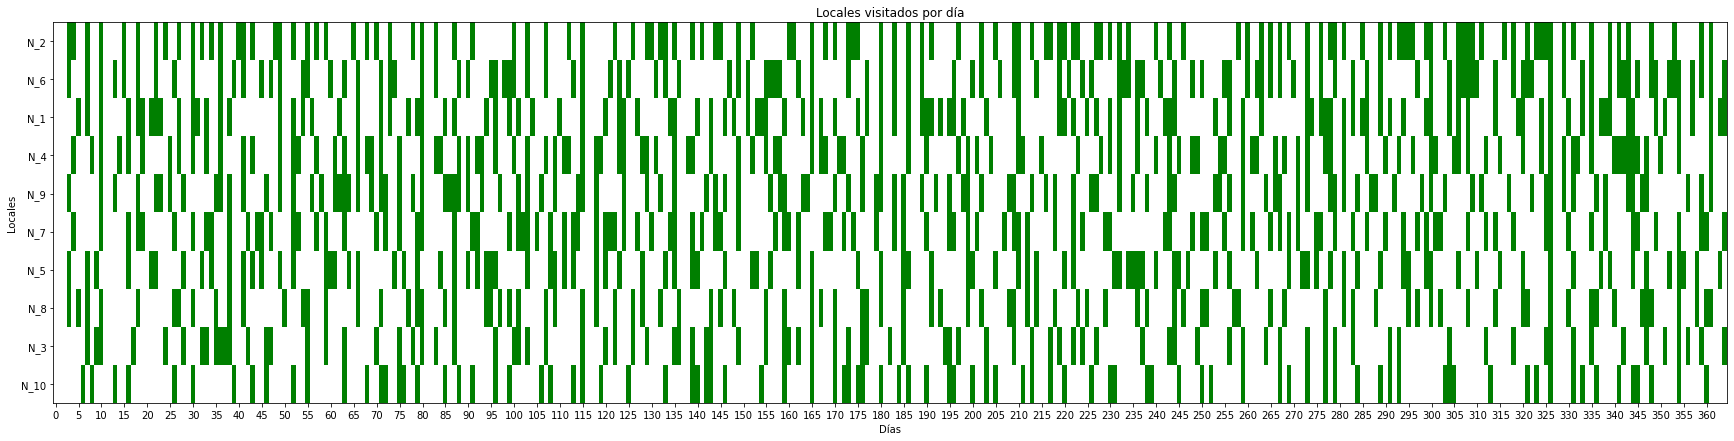

Listo n10full.xlsx con demanda c


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 1752854.428435444
Final LS: {0: []}, costo SO = 1752854.428435444
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_9', 'N_1', 'N_6', 'N_0'], costo SO = 447371.36758299783
Final LS: [['N_0', 'N_6', 'N_10', 'N_9', 'N_1']], costo SO = 148393.67192951363
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_10', 'N_9', 'N_1', 'N_0'] | costo_SO: 45.262878941741796 | costo_r: 940.9271893247159


Inicial LS: ['N_0', 'N_4', 'N_2', 'N_0'], costo SO = 1139137.261168051
Final LS: [['N_0', 'N_5', 'N_2']], costo SO = 237366.93295983746
Tiempo: 4 | Ruta: ['N_0', 'N_5', 'N_2', 'N_0'] | costo_SO: 33.12375900839254 | costo_r: 595.9641315769974


Inicial LS: ['N_0', 'N_4', 'N_3', 'N_7', 'N_8', 'N_0'], costo SO 

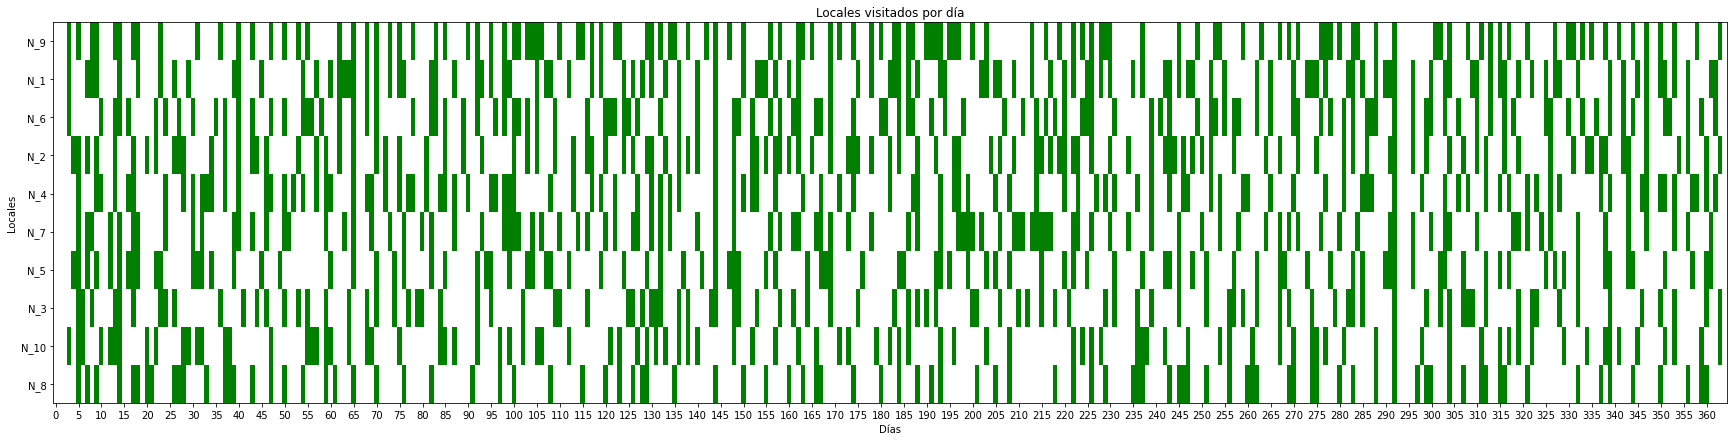

Listo n10full.xlsx con demanda o


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_4', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_9', 'N_9', 'N_7', 'N_17', 'N_14', 'N_20', 'N_13', 'N_19', 'N_15', 'N_1', 'N_15', 'N_18', 'N_8', 'N_19', 'N_10', 'N_2', 'N_11', 'N_12', 'N_6', 'N_19', 'N_4', 'N_18', 'N_5', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_9', 'N_7', 'N_17', 'N_14', 'N_20', 'N_13', 'N_19', 'N_15', 'N_1', 'N_18', 'N_8', 'N_10', 'N_2', 'N_11', 'N_12', 'N_6', 'N_4', 'N_5', 'N_0'] | costo_SO: 158.9596312969964 | costo_r: 4758.73379048439


Inicial LS: ['N_0', 'N_3', 'N_9', 'N_11', 'N_16', 'N_18', 'N_10', 'N_7', 'N_0'], costo SO = 4791176.911719339
Final LS: [['N_0', 'N_9', 'N_10', 'N_17', 'N_18', 'N_6', 'N_3', 'N_14', 'N_11']], costo SO = 4669058.836481063
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_10', 'N_17', 'N_18', 'N_6', 'N_3', 'N_14', 'N_11', 'N_0'] | cost

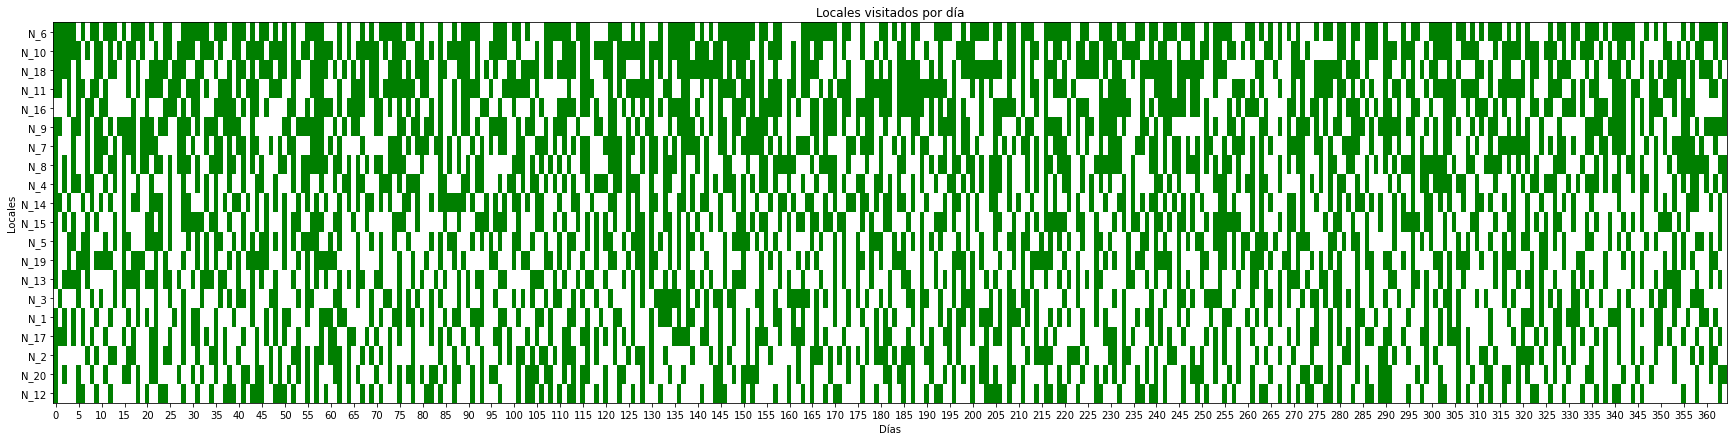

Listo n20empty.xlsx con demanda n


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_4', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_8', 'N_9', 'N_9', 'N_19', 'N_3', 'N_11', 'N_7', 'N_13', 'N_1', 'N_16', 'N_4', 'N_17', 'N_12', 'N_11', 'N_16', 'N_20', 'N_12', 'N_4', 'N_18', 'N_15', 'N_10', 'N_5', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_8', 'N_9', 'N_19', 'N_3', 'N_11', 'N_7', 'N_13', 'N_1', 'N_16', 'N_4', 'N_17', 'N_12', 'N_20', 'N_18', 'N_15', 'N_10', 'N_5', 'N_0'] | costo_SO: 194.179117424965 | costo_r: 3951.033530417356


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_2', 'N_10', 'N_7', 'N_14', 'N_0'], costo SO = 1221418.943583609
Final LS: [['N_0', 'N_14', 'N_9', 'N_11', 'N_2', 'N_10', 'N_1', 'N_10', 'N_15', 'N_14', 'N_16', 'N_18', 'N_7', 'N_6']], costo SO = 761446.9886991685
Tiempo: 1 | Ruta: ['N_0', 'N_14', 'N_9', 'N_11', 'N_2'

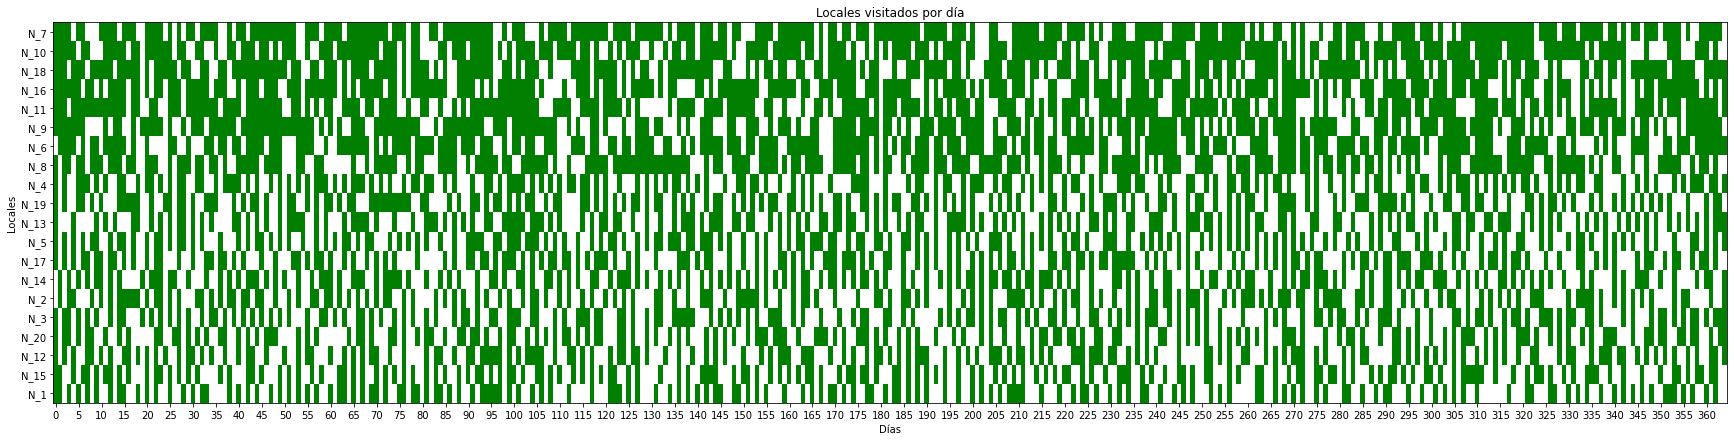

Listo n20empty.xlsx con demanda c


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_4', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_20', 'N_4', 'N_13', 'N_3', 'N_10', 'N_2', 'N_13', 'N_3', 'N_15', 'N_19', 'N_5', 'N_4', 'N_7', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_20', 'N_4', 'N_13', 'N_10', 'N_2', 'N_15', 'N_19', 'N_5', 'N_7', 'N_0'] | costo_SO: 298.63767991944314 | costo_r: 3354.6267111960524


Inicial LS: ['N_0', 'N_9', 'N_8', 'N_17', 'N_18', 'N_16', 'N_12', 'N_1', 'N_10', 'N_14', 'N_0'], costo SO = 7867489.858595772
Final LS: [['N_0', 'N_13', 'N_6', 'N_10', 'N_20', 'N_2', 'N_8', 'N_7', 'N_1', 'N_3']], costo SO = 6457058.102354171
Tiempo: 1 | Ruta: ['N_0', 'N_13', 'N_6', 'N_10', 'N_20', 'N_2', 'N_8', 'N_7', 'N_1', 'N_3', 'N_0'] | costo_SO: 324.0415258494884 | costo_r: 2411.062559594632


Ini

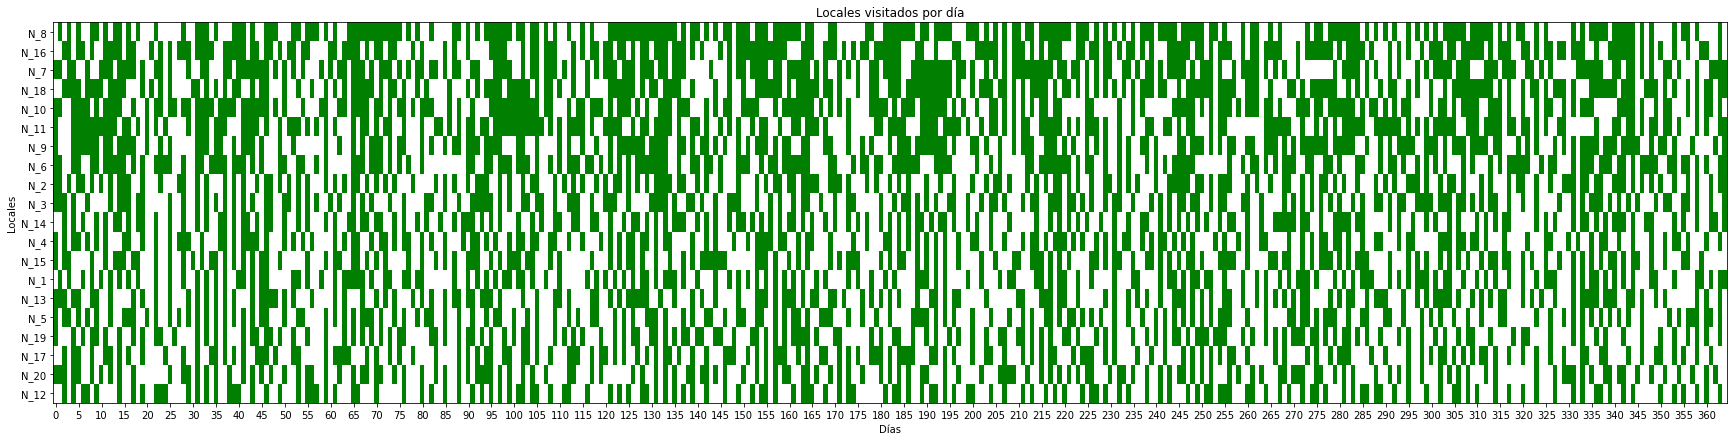

Listo n20empty.xlsx con demanda o


Inicial LS: ['N_0', 'N_11', 'N_0'], costo SO = 7047089.257043505
Final LS: [['N_0', 'N_9', 'N_16', 'N_17', 'N_11', 'N_18']], costo SO = 5465834.88319768
Tiempo: 0 | Ruta: ['N_0', 'N_9', 'N_16', 'N_17', 'N_11', 'N_18', 'N_0'] | costo_SO: 33.28032453046094 | costo_r: 722.0407319254952


Inicial LS: ['N_0', 'N_6', 'N_8', 'N_20', 'N_13', 'N_18', 'N_16', 'N_10', 'N_15', 'N_7', 'N_0'], costo SO = 6320211.884165821
Final LS: [['N_0', 'N_16', 'N_13', 'N_18', 'N_8', 'N_9', 'N_17', 'N_3', 'N_5', 'N_12', 'N_20', 'N_7']], costo SO = 3719698.143811955
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_13', 'N_18', 'N_8', 'N_9', 'N_17', 'N_3', 'N_5', 'N_12', 'N_20', 'N_7', 'N_0'] | costo_SO: 282.44258218825826 | costo_r: 2606.895179035398


Inicial LS: ['N_0', 'N_6', 'N_11', 'N_4', 'N_10', 'N_15', 'N_7', 'N_14', 'N_16', 'N_19', 'N_1', 'N_2', 'N_0'], costo SO = 3763778.62203847
Final LS: [['N_0', 'N_16', 'N_1', 'N_4', 'N_18', 'N_15', 'N_5', 'N_9', 'N_14', 'N_6', 'N_19', 'N_8', '

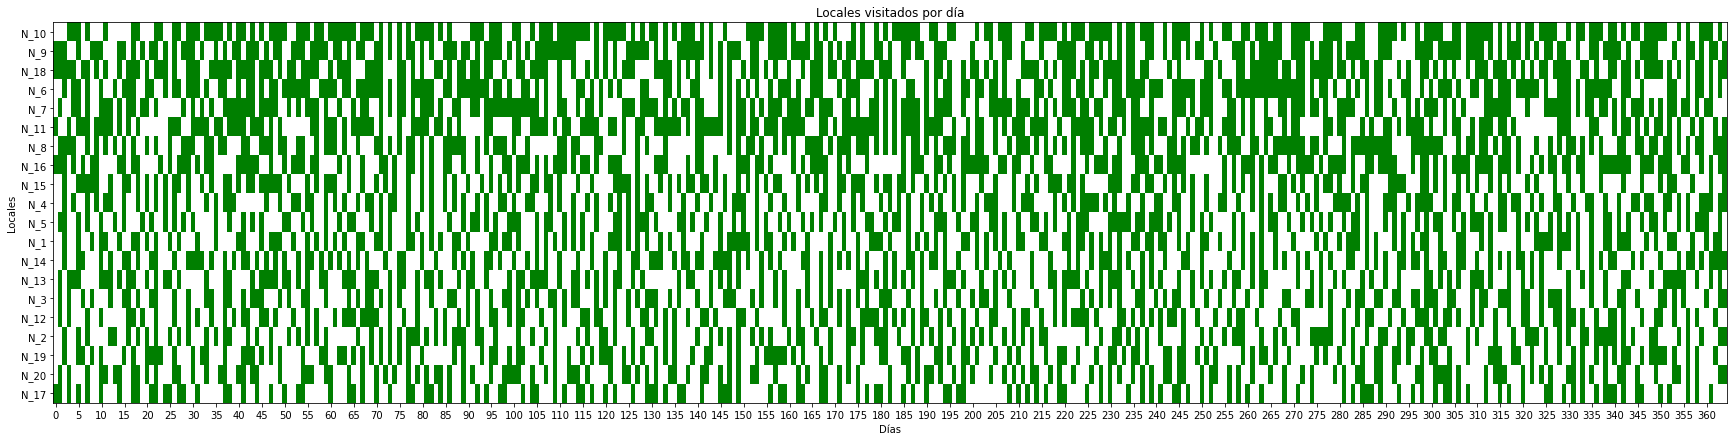

Listo n20estandar.xlsx con demanda n


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_10', 'N_7', 'N_0'], costo SO = 2551662.0836343262
Final LS: [['N_0', 'N_9', 'N_12', 'N_18', 'N_16', 'N_7']], costo SO = 2069150.054555203
Tiempo: 0 | Ruta: ['N_0', 'N_9', 'N_12', 'N_18', 'N_16', 'N_7', 'N_0'] | costo_SO: 195.7907969882444 | costo_r: 840.3729204706269


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_19', 'N_10', 'N_15', 'N_7', 'N_4', 'N_5', 'N_0'], costo SO = 759057.9685078025
Final LS: [['N_0', 'N_6', 'N_6', 'N_13', 'N_8', 'N_9', 'N_1', 'N_2', 'N_12', 'N_17', 'N_4', 'N_18', 'N_10', 'N_18', 'N_16', 'N_12', 'N_19', 'N_1', 'N_3', 'N_5']], costo SO = 441965.1097502823
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_13', 'N_8', 'N_9', 'N_1', 'N_2', 'N_12', 'N_17', 'N_4', 'N_18', 'N_10', 'N_16', 'N_19', 'N_3', 'N_5', 'N_0'] | costo_SO: 164.01444274773777 | costo_r: 2992.6376984629883


Inicial LS: ['N_0', 'N_6', 'N_9

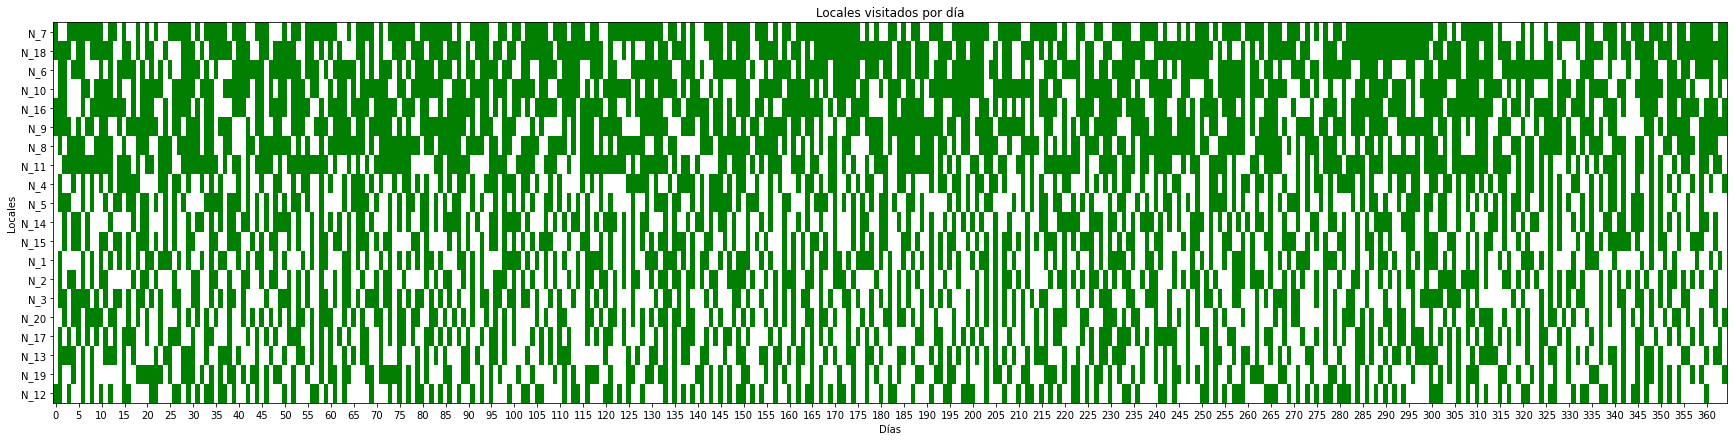

Listo n20estandar.xlsx con demanda c


Inicial LS: [], costo SO = 12862158.204061426
Final LS: {0: []}, costo SO = 12862158.204061426
Tiempo: 0 | Ruta: [] | costo_SO: 287.96328579534645 | costo_r: 0


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_1', 'N_2', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_7', 'N_0'], costo SO = 4228645.874444721
Final LS: {0: ['N_0', 'N_3', 'N_6', 'N_19', 'N_1', 'N_17', 'N_7', 'N_1', 'N_2', 'N_3', 'N_14', 'N_8', 'N_1', 'N_12', 'N_16', 'N_3', 'N_19', 'N_7', 'N_10', 'N_7', 'N_14', 'N_18', 'N_0']}, costo SO = 4228645.874444721
Tiempo: 1 | Ruta: ['N_0', 'N_3', 'N_6', 'N_19', 'N_1', 'N_17', 'N_7', 'N_2', 'N_14', 'N_8', 'N_12', 'N_16', 'N_10', 'N_18', 'N_0'] | costo_SO: 208.7809840748148 | costo_r: 3423.2100731425257


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_4', 'N_5', 'N_10', 'N_15', 'N_7', 'N_16', 'N_18', 'N_0'], costo SO = 3993700.9345025094
Final LS: {0: ['N_0', 'N_11', 'N_13', 'N_9', 'N_5', 'N_16', 'N_4', 'N_8', 'N_0']

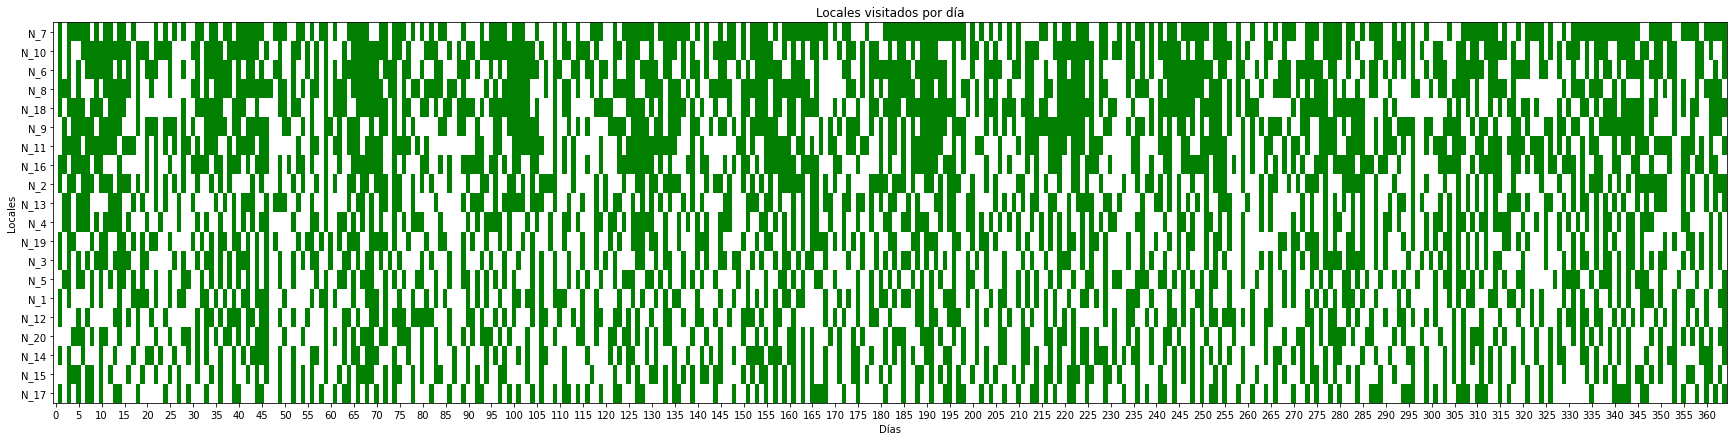

Listo n20estandar.xlsx con demanda o


Inicial LS: [], costo SO = 2701204.506280593
Final LS: {0: []}, costo SO = 2701204.506280593
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_6', 'N_11', 'N_8', 'N_10', 'N_0'], costo SO = 6068396.9784471765
Final LS: {0: ['N_0', 'N_6', 'N_0']}, costo SO = 6068396.9784471765
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_0'] | costo_SO: 198.38674702348902 | costo_r: 47.01063709417264


Inicial LS: ['N_0', 'N_9', 'N_11', 'N_8', 'N_17', 'N_18', 'N_16', 'N_2', 'N_4', 'N_5', 'N_10', 'N_7', 'N_0'], costo SO = 4337372.730212161
Final LS: [['N_0', 'N_11', 'N_4', 'N_9', 'N_4', 'N_10', 'N_2', 'N_7']], costo SO = 4121541.5318899686
Tiempo: 2 | Ruta: ['N_0', 'N_11', 'N_4', 'N_9', 'N_10', 'N_2', 'N_7', 'N_0'] | costo_SO: 390.4722221467675 | costo_r: 1572.439374474201


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_8', 'N_20', 'N_13', 'N_1', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_7', 'N_14', 'N_15', 'N_5', 'N_0'], costo SO = 2957126.4926655544
Final LS:

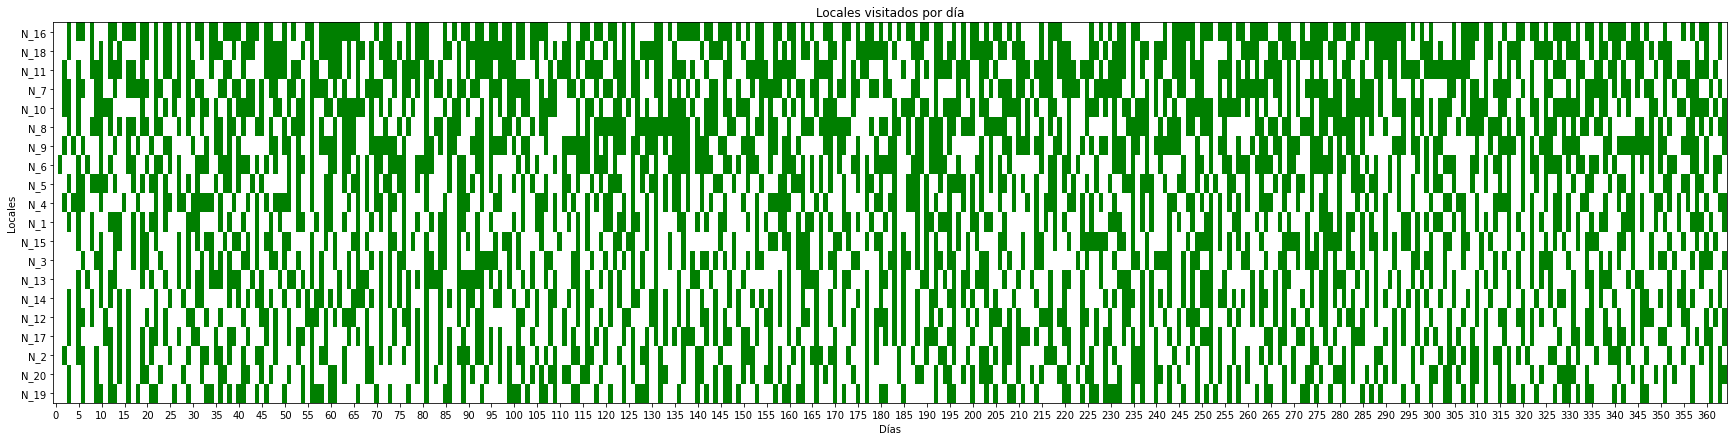

Listo n20full.xlsx con demanda n


Inicial LS: [], costo SO = 3009217.1433821158
Final LS: {0: []}, costo SO = 3009217.1433821158
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_10', 'N_7', 'N_0'], costo SO = 3503262.2166379294
Final LS: [['N_0', 'N_4', 'N_10', 'N_2', 'N_16', 'N_11', 'N_6', 'N_3', 'N_14', 'N_7']], costo SO = 3076768.4252009178
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_10', 'N_2', 'N_16', 'N_11', 'N_6', 'N_3', 'N_14', 'N_7', 'N_0'] | costo_SO: 11.26931071645711 | costo_r: 1773.929903472423


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_17', 'N_18', 'N_19', 'N_10', 'N_15', 'N_7', 'N_5', 'N_0'], costo SO = 2365967.387226394
Final LS: [['N_0', 'N_13', 'N_16', 'N_13', 'N_20', 'N_6', 'N_9', 'N_9', 'N_10', 'N_15', 'N_8', 'N_1', 'N_15', 'N_18', 'N_7', 'N_5']], costo SO = 757821.0328768248
Tiempo: 2 | Ruta: ['N_0', 'N_13', 'N_16', 'N_20', 'N_6', 'N_9', 'N_10', 'N_15', 'N_8', 'N_1', 'N_

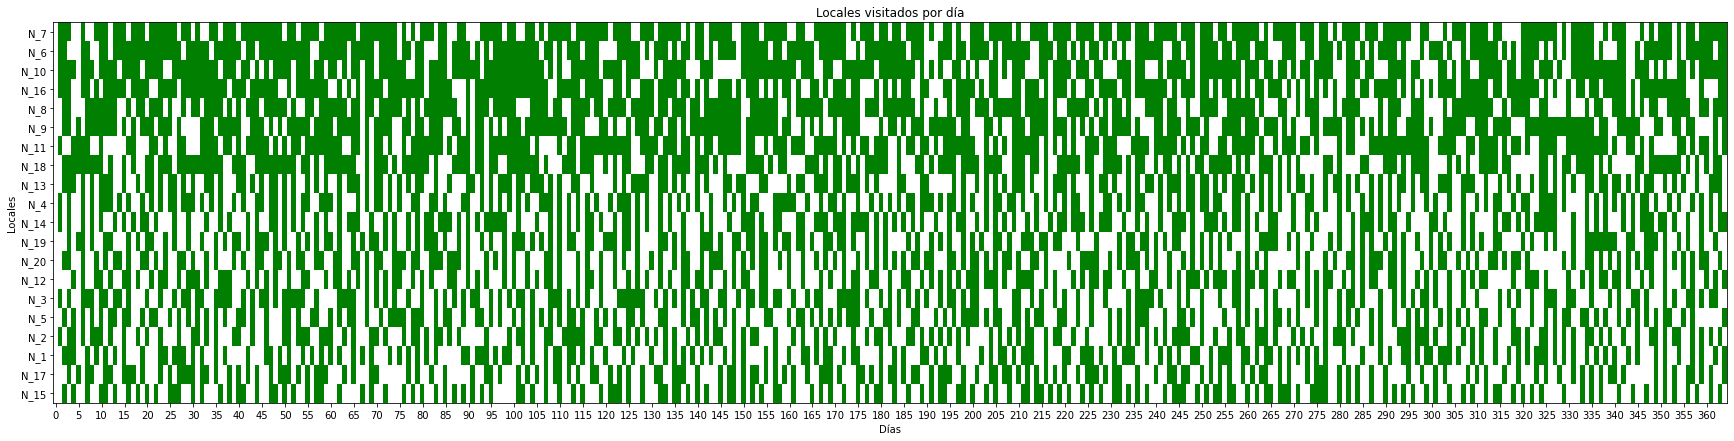

Listo n20full.xlsx con demanda c


Inicial LS: [], costo SO = 5319384.901339532
Final LS: {0: []}, costo SO = 5319384.901339532
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_6', 'N_11', 'N_16', 'N_10', 'N_7', 'N_0'], costo SO = 8663625.1100603
Final LS: [['N_0', 'N_11', 'N_16', 'N_15', 'N_4', 'N_19', 'N_14', 'N_3', 'N_9', 'N_11', 'N_15', 'N_6', 'N_7']], costo SO = 4082372.6913266745
Tiempo: 1 | Ruta: ['N_0', 'N_11', 'N_16', 'N_15', 'N_4', 'N_19', 'N_14', 'N_3', 'N_9', 'N_6', 'N_7', 'N_0'] | costo_SO: 91.50096599580857 | costo_r: 2405.210587567075


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_13', 'N_1', 'N_2', 'N_18', 'N_16', 'N_10', 'N_7', 'N_0'], costo SO = 5193702.155594526
Final LS: [['N_0', 'N_9', 'N_20', 'N_12', 'N_6', 'N_5', 'N_15', 'N_11', 'N_18', 'N_2', 'N_10', 'N_13', 'N_7']], costo SO = 4157846.1398062934
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_20', 'N_12', 'N_6', 'N_5', 'N_15', 'N_11', 'N_18', 'N_2', 'N_10', 'N_13', 'N_7', 'N_0'] | costo_SO: 1

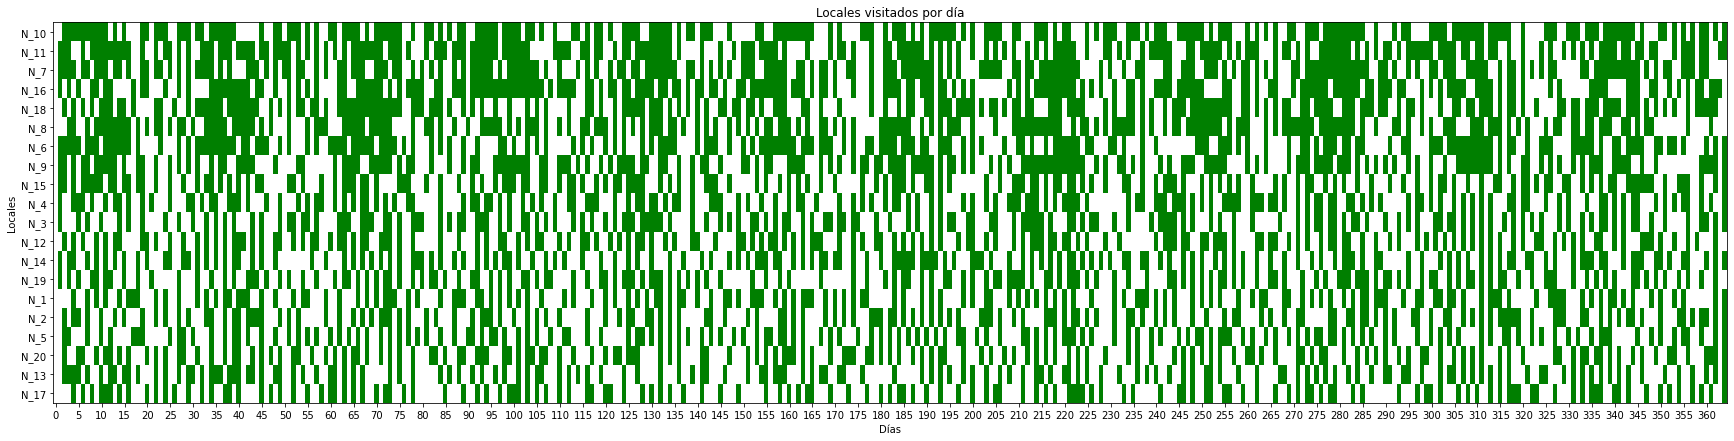

Listo n20full.xlsx con demanda o


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_20', 'N_24', 'N_20', 'N_3', 'N_11', 'N_30', 'N_20', 'N_21', 'N_6', 'N_25', 'N_22', 'N_15', 'N_14', 'N_8', 'N_9', 'N_10', 'N_1', 'N_25', 'N_2', 'N_14', 'N_13', 'N_29', 'N_5', 'N_22', 'N_18', 'N_23', 'N_12', 'N_26', 'N_19', 'N_7', 'N_23', 'N_16', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_20', 'N_24', 'N_3', 'N_11', 'N_30', 'N_21', 'N_6', 'N_25', 'N_22', 'N_15', 'N_14', 'N_8', 'N_9', 'N_10', 'N_1', 'N_2', 'N_13', 'N_29', 'N_5', 'N_18', 'N_23', 'N_12', 'N_26', 'N_19', 'N_7', 'N_16', 'N_0'] | costo_SO: 210.66459668093376 | costo_r: 4945.5331666446755


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_17', 'N_27', 'N_19', 'N_25', 'N_8', 'N_2', 'N_4', 'N_1

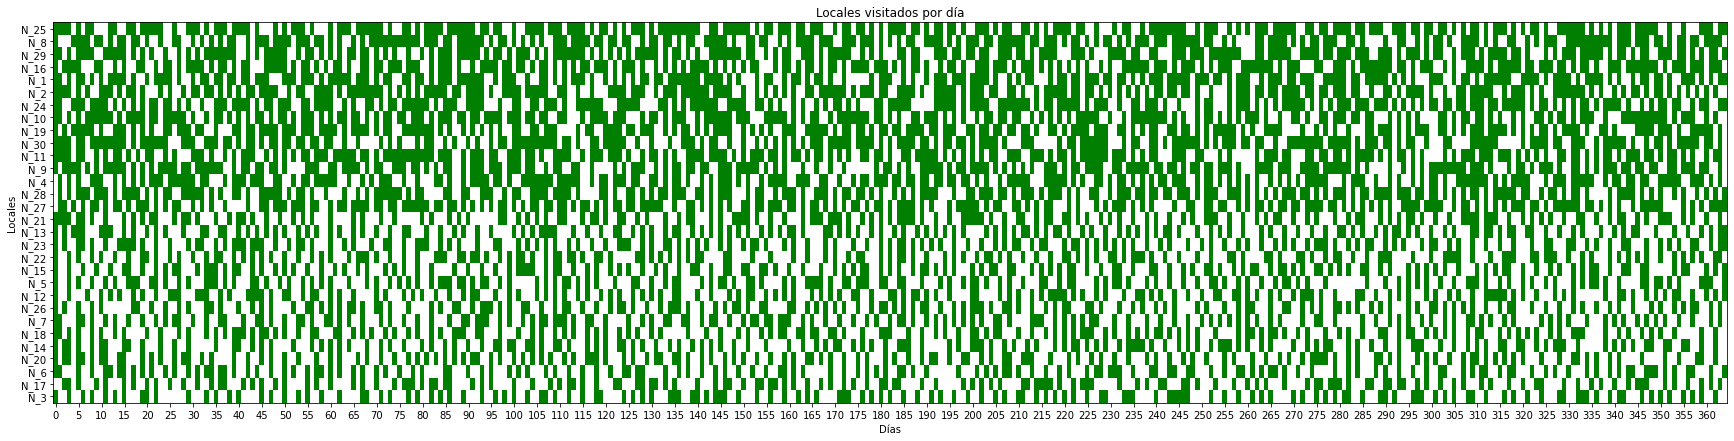

Listo n30empty.xlsx con demanda n


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_13', 'N_9', 'N_24', 'N_10', 'N_3', 'N_23', 'N_11', 'N_2', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_13', 'N_8', 'N_9', 'N_25', 'N_21', 'N_29', 'N_4', 'N_27', 'N_22', 'N_1', 'N_12', 'N_26', 'N_7', 'N_19', 'N_20', 'N_16', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_13', 'N_9', 'N_24', 'N_10', 'N_3', 'N_23', 'N_11', 'N_2', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_8', 'N_25', 'N_21', 'N_29', 'N_4', 'N_27', 'N_22', 'N_1', 'N_12', 'N_26', 'N_7', 'N_19', 'N_20', 'N_16', 'N_0'] | costo_SO: 185.59318088624133 | costo_r: 5531.311949458076


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_30', 'N_27', 'N_5', 'N_18', 'N_2', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25'

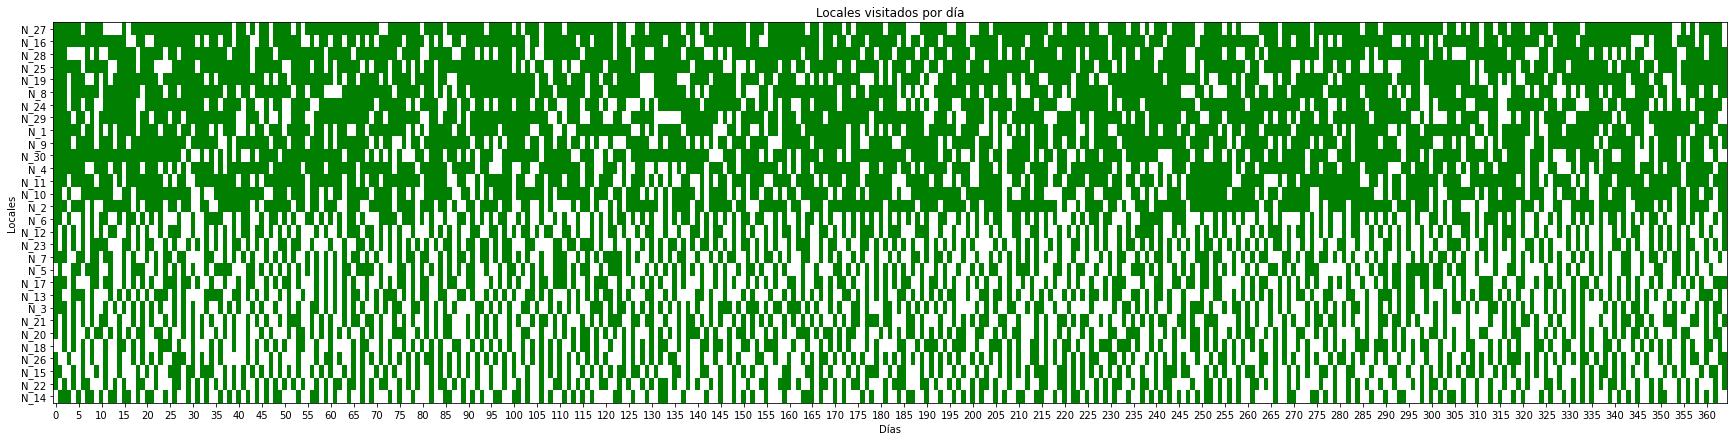

Listo n30empty.xlsx con demanda c


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_20', 'N_11', 'N_24', 'N_22', 'N_4', 'N_28', 'N_23', 'N_30', 'N_17', 'N_13', 'N_6', 'N_19', 'N_14', 'N_26', 'N_6', 'N_2', 'N_27', 'N_22', 'N_18', 'N_29', 'N_12', 'N_5', 'N_1', 'N_26', 'N_3', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_20', 'N_11', 'N_24', 'N_22', 'N_4', 'N_28', 'N_23', 'N_30', 'N_17', 'N_13', 'N_6', 'N_19', 'N_14', 'N_26', 'N_2', 'N_27', 'N_18', 'N_29', 'N_12', 'N_5', 'N_1', 'N_3', 'N_0'] | costo_SO: 364.49720525917377 | costo_r: 3965.427364694663


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_30', 'N_15', 'N_27', 'N_25', 'N_16', 'N_8', 'N_9', 'N_21', 'N_4', 'N_7', 'N_10', 'N_0'], costo SO = 9718138.427863257
Final LS: [['N_0', 'N_24', 'N

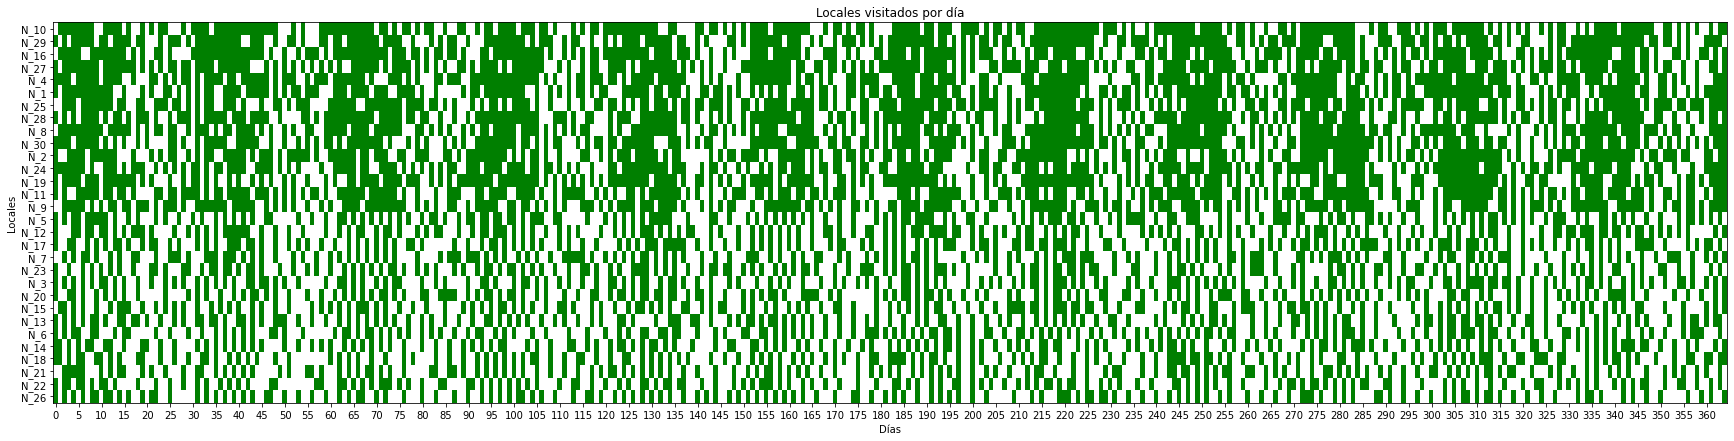

Listo n30empty.xlsx con demanda o


Inicial LS: ['N_0', 'N_25', 'N_0'], costo SO = 11880495.049751127
Final LS: [['N_0', 'N_10', 'N_14', 'N_25']], costo SO = 10881892.61291032
Tiempo: 0 | Ruta: ['N_0', 'N_10', 'N_14', 'N_25', 'N_0'] | costo_SO: 491.8916146349678 | costo_r: 670.9624171339977


Inicial LS: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_12', 'N_27', 'N_5', 'N_18', 'N_2', 'N_9', 'N_8', 'N_29', 'N_4', 'N_22', 'N_19', 'N_25', 'N_16', 'N_10', 'N_1', 'N_26', 'N_0'], costo SO = 2933093.7472445793
Final LS: {0: ['N_0', 'N_28', 'N_27', 'N_3', 'N_15', 'N_8', 'N_12', 'N_5', 'N_18', 'N_2', 'N_9', 'N_30', 'N_29', 'N_16', 'N_16', 'N_28', 'N_25', 'N_11', 'N_4', 'N_22', 'N_17', 'N_18', 'N_19', 'N_25', 'N_10', 'N_1', 'N_26', 'N_0']}, costo SO = 2933093.7472445793
Tiempo: 1 | Ruta: ['N_0', 'N_28', 'N_27', 'N_3', 'N_15', 'N_8', 'N_12', 'N_5', 'N_18', 'N_2', 'N_9', 'N_30', 'N_29', 'N_16', 'N_25', 'N_11', 'N_4', 'N_22', 'N_17', 'N_19', 'N_10', 'N_1', 'N_26', 'N_0'] | costo

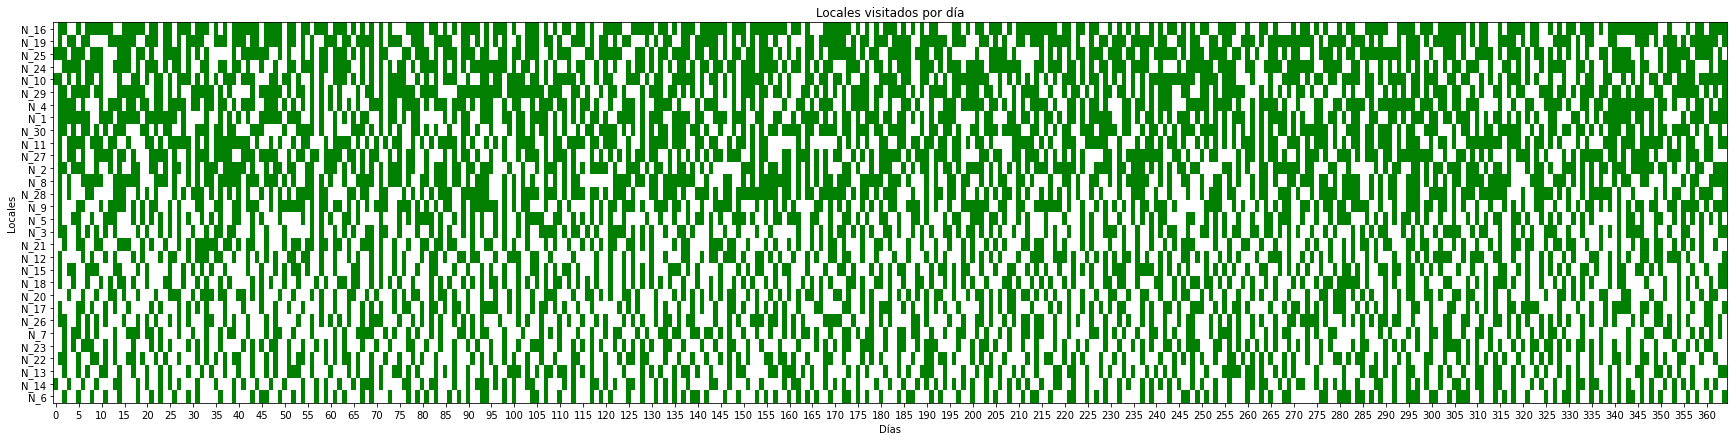

Listo n30estandar.xlsx con demanda n


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_30', 'N_27', 'N_19', 'N_25', 'N_16', 'N_8', 'N_9', 'N_2', 'N_29', 'N_4', 'N_1', 'N_10', 'N_0'], costo SO = 3452163.1222437304
Final LS: [['N_0', 'N_11', 'N_23', 'N_25', 'N_7', 'N_19', 'N_27', 'N_8', 'N_30', 'N_2', 'N_29', 'N_10']], costo SO = 2843627.6407304867
Tiempo: 0 | Ruta: ['N_0', 'N_11', 'N_23', 'N_25', 'N_7', 'N_19', 'N_27', 'N_8', 'N_30', 'N_2', 'N_29', 'N_10', 'N_0'] | costo_SO: 215.75899474513434 | costo_r: 2264.690320919136


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_16', 'N_0'], costo SO = 762922.5189699035
Final LS: {0: ['N_0', 'N_24', 'N_28', 'N_11', 'N_26', 'N_30', 'N_1', 'N_15', 'N_7', 'N_18', 'N_25', 'N_20', 'N_21', 'N_19', 'N_29', 'N_22', 'N_4', 'N_8', 'N_27', 'N_12', 'N_5', 'N_13', 'N_10', 'N_9', 'N_16',

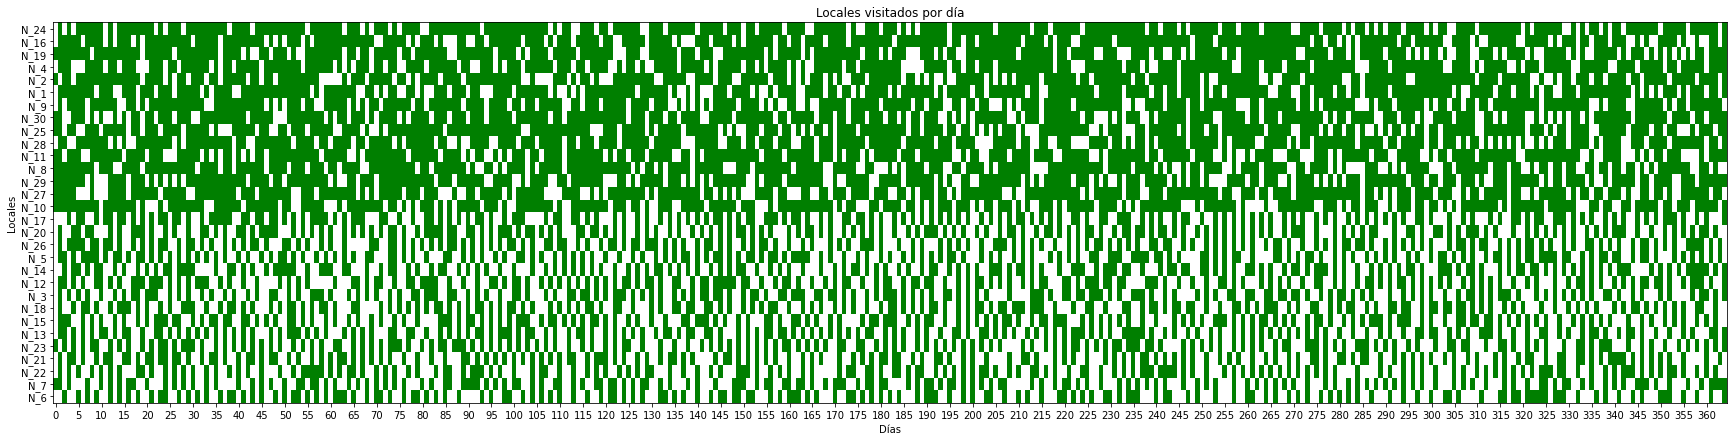

Listo n30estandar.xlsx con demanda c


Inicial LS: [], costo SO = 17488894.00139875
Final LS: {0: []}, costo SO = 17488894.00139875
Tiempo: 0 | Ruta: [] | costo_SO: 381.94009183046614 | costo_r: 0


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_12', 'N_27', 'N_5', 'N_21', 'N_2', 'N_9', 'N_8', 'N_29', 'N_4', 'N_19', 'N_25', 'N_16', 'N_10', 'N_1', 'N_0'], costo SO = 3929167.8127365424
Final LS: {0: ['N_0', 'N_22', 'N_21', 'N_20', 'N_3', 'N_29', 'N_11', 'N_2', 'N_9', 'N_28', 'N_30', 'N_15', 'N_17', 'N_12', 'N_5', 'N_27', 'N_2', 'N_29', 'N_23', 'N_25', 'N_19', 'N_10', 'N_1', 'N_0']}, costo SO = 3929167.8127365424
Tiempo: 1 | Ruta: ['N_0', 'N_22', 'N_21', 'N_20', 'N_3', 'N_29', 'N_11', 'N_2', 'N_9', 'N_28', 'N_30', 'N_15', 'N_17', 'N_12', 'N_5', 'N_27', 'N_23', 'N_25', 'N_19', 'N_10', 'N_1', 'N_0'] | costo_SO: 484.54759155923153 | costo_r: 3170.2645497927506


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_30', 'N_6', 'N_19', 'N_14', 'N_8', 'N_9', 'N_18', 'N_

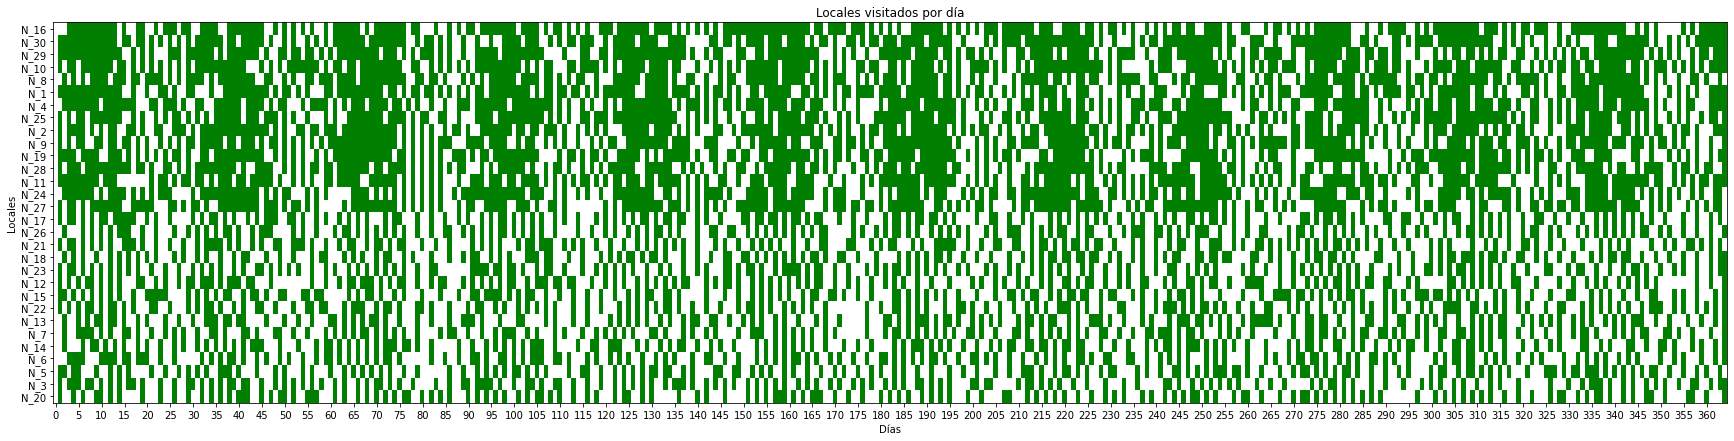

Listo n30estandar.xlsx con demanda o


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 6138372.442742323
Final LS: {0: []}, costo SO = 6138372.442742323
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_11', 'N_30', 'N_7', 'N_10', 'N_23', 'N_5', 'N_2', 'N_22', 'N_4', 'N_8', 'N_0'], costo SO = 7824165.09439575
Final LS: [['N_0', 'N_3', 'N_20', 'N_2', 'N_12', 'N_18', 'N_7', 'N_29', 'N_22', 'N_10', 'N_5', 'N_30', 'N_4']], costo SO = 4812968.072422243
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_20', 'N_2', 'N_12', 'N_18', 'N_7', 'N_29', 'N_22', 'N_10', 'N_5', 'N_30', 'N_4', 'N_0'] | costo_SO: 272.5953747299687 | costo_r: 2574.05001864788


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_17', 'N_15', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_13', 'N_21', 'N_27', 'N_23', 'N_16', 'N_1', 'N_26', 'N_0'], costo SO = 1708161.412201925
Final LS: [['N_0', 'N_25', 'N_1', 

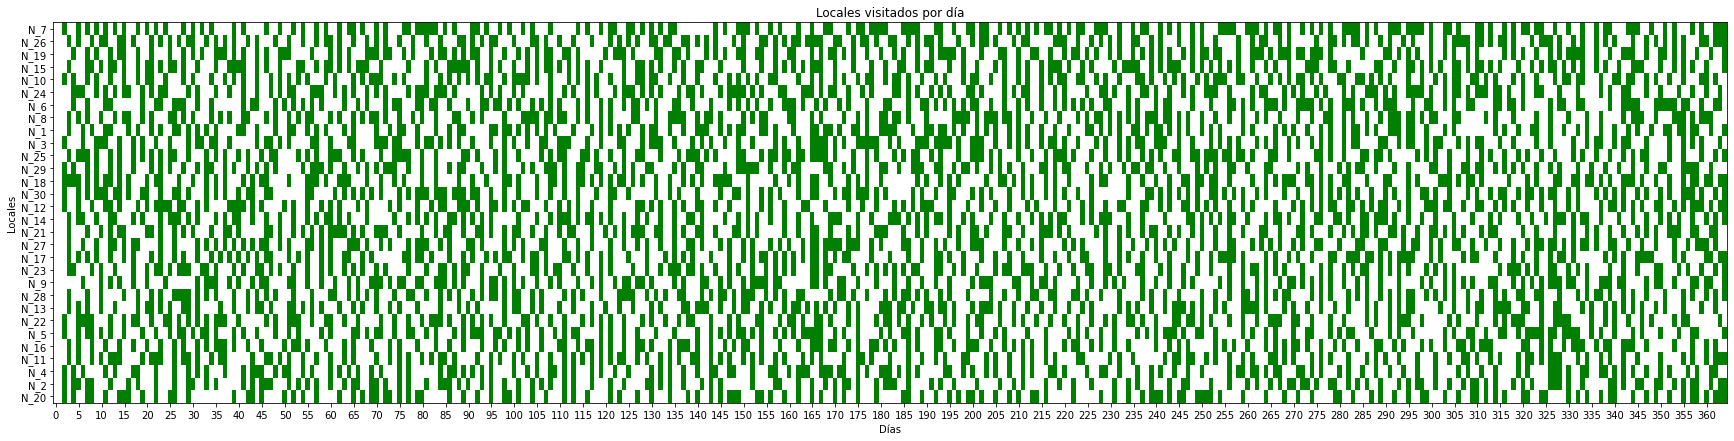

Listo n30full.xlsx con demanda n


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 6032759.762919734
Final LS: {0: []}, costo SO = 6032759.762919734
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_28', 'N_7', 'N_10', 'N_17', 'N_15', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_5', 'N_12', 'N_27', 'N_23', 'N_16', 'N_1', 'N_26', 'N_0'], costo SO = 1704505.9112233678
Final LS: [['N_0', 'N_26', 'N_24', 'N_22', 'N_28', 'N_23', 'N_21', 'N_10', 'N_1', 'N_17', 'N_15', 'N_19', 'N_14', 'N_1', 'N_3', 'N_13', 'N_8', 'N_4', 'N_20', 'N_29', 'N_12', 'N_9', 'N_27', 'N_16']], costo SO = 911047.1442839346
Tiempo: 2 | Ruta: ['N_0', 'N_26', 'N_24', 'N_22', 'N_28', 'N_23', 'N_21', 'N_10', 'N_1', 'N_17', 'N_15', 'N_19', 'N_14', 'N_3', 'N_13', 'N_8', 'N_4', 'N_20', 'N_29', 'N_12', 'N_9', 'N_27', 'N_16', 'N_0'] | costo_SO

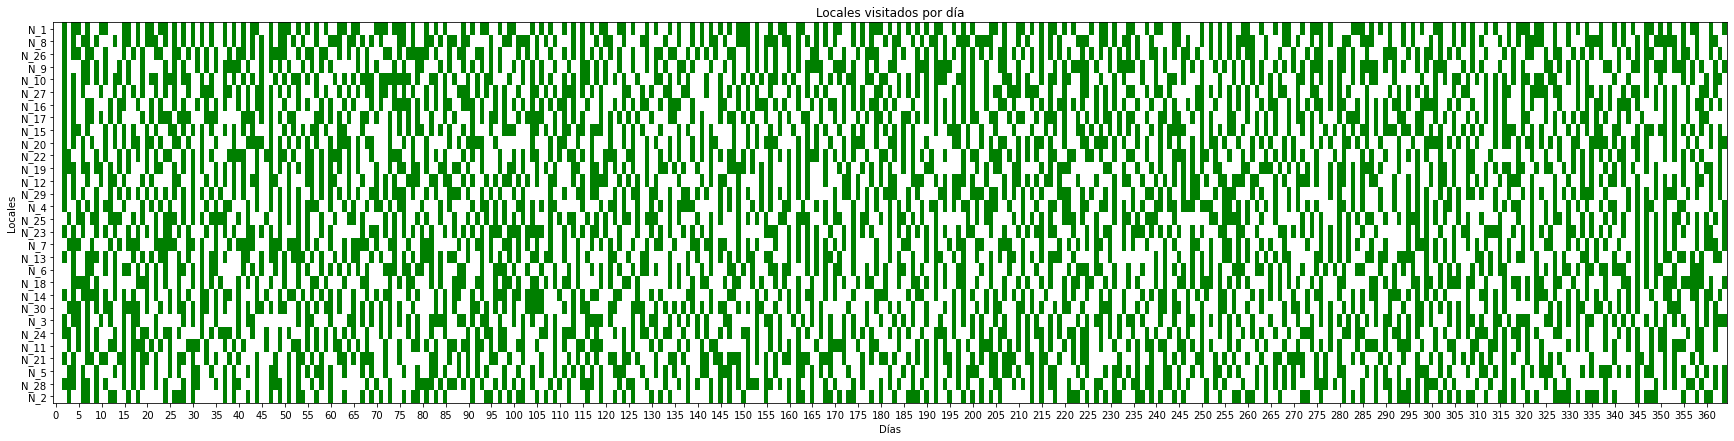

Listo n30full.xlsx con demanda c


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 14312101.9093491
Final LS: {0: []}, costo SO = 14312101.9093491
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_16', 'N_23', 'N_7', 'N_12', 'N_27', 'N_18', 'N_2', 'N_9', 'N_13', 'N_4', 'N_22', 'N_26', 'N_1', 'N_0'], costo SO = 3053544.466315932
Final LS: [['N_0', 'N_23', 'N_18', 'N_17', 'N_3', 'N_14', 'N_7', 'N_11', 'N_24', 'N_28', 'N_25', 'N_20', 'N_6', 'N_19', 'N_16', 'N_21', 'N_9', 'N_22', 'N_4', 'N_27', 'N_1']], costo SO = 1811119.9807995758
Tiempo: 2 | Ruta: ['N_0', 'N_23', 'N_18', 'N_17', 'N_3', 'N_14', 'N_7', 'N_11', 'N_24', 'N_28', 'N_25', 'N_20', 'N_6', 'N_19', 'N_16', 'N_21', 'N_9', 'N_22', 'N_4', 'N_27', 'N_1', 'N_0'] | costo_SO: 528.3328851169207 | costo_r: 3881.453179267216


Inicial LS: ['

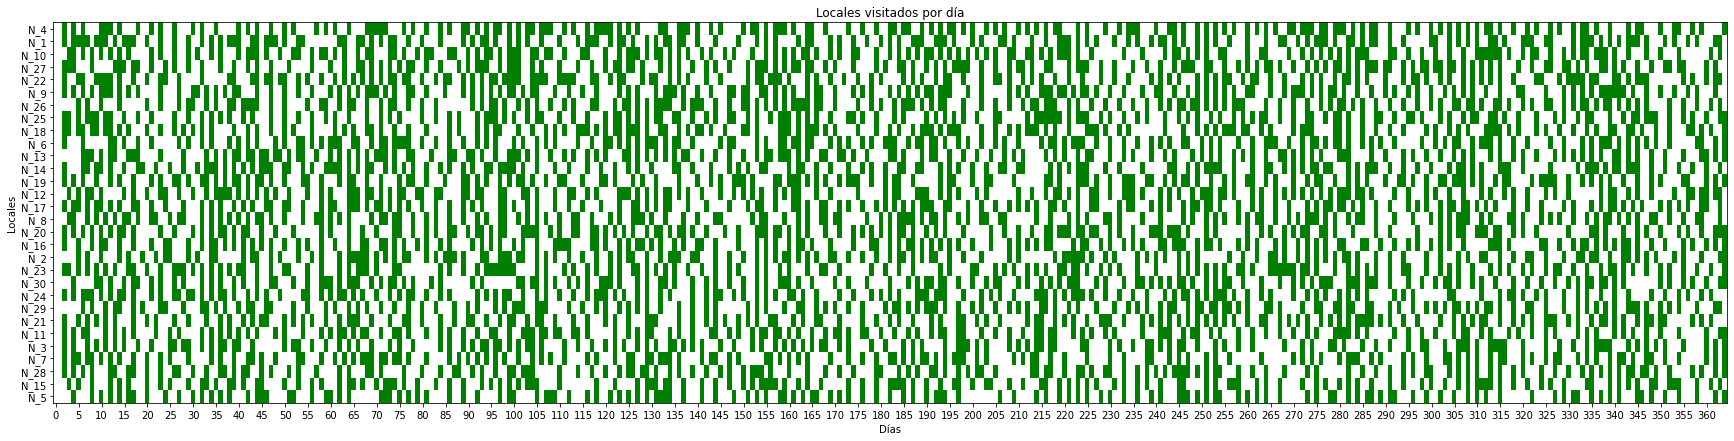

Listo n30full.xlsx con demanda o


In [5]:
#n_s = [10,20,30]
#inicial = ['empty', 'estandar', 'full']
#demandas = ['n', 'c', 'o']
datos_P_sim = {}
df_costos_P = pd.DataFrame()
for n in n_s:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output = f'plots//tablero_P_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)
            #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
            rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(grafo_inicial = G, dem_historico = historia, cap = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30)
            datos_P_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P,
                                            'costos': costos_P, 'demanda': dems_P}
            
            costos_consolidados = calcular_costo_consolidado(costos_P, inventarios_P)
            df_costos_P = pd.concat([df_costos_P, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1
            df = generar_df(rutas_P, N)
            plotear_tablero_visitas(df, guardar = True, nombre = output)
            print (f'Listo {file_name} con demanda {dem}')

df_costos_P.to_csv('costos_P.csv')
json.dump(datos_P_sim, open('datos_P_sim.json', 'w'))